# Final project

Import and statistical analysis of each light curve.
Implementation of QNPy software on quazar light curves.

Author: Teodora Vilimonovic

### Statistical analysis of the light curves before appying the QNPy software

In [1]:
import os
import pandas as pd

# Set the path to your folder containing files
folder_path = r'C:\Users\Teodora\OneDrive\Desktop\Test project\kriveu'

# Create a folder to store the CSV files
output_folder = r'C:\Users\Teodora\OneDrive\Desktop\Test project\output'
os.makedirs(output_folder, exist_ok=True)

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)

    # Check if the item is a file (not a subfolder) and if it has the expected "file" type
    if os.path.isfile(file_path):
        # Assuming the file is a text file, you may need to adjust the file reading logic
        data = pd.read_csv(file_path)  # Adjust the delimiter if needed



        # Save the processed data to an individual CSV file
        output_csv_path = os.path.join(output_folder, f'{filename}.csv')
        data.to_csv(output_csv_path, index=False)

        print(f'Conversion completed for {filename}. CSV file saved at: {output_csv_path}')


Conversion completed for 1384375. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1384375.csv
Conversion completed for 1384957. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1384957.csv
Conversion completed for 1385163. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1385163.csv
Conversion completed for 1385234. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1385234.csv
Conversion completed for 1385498. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1385498.csv
Conversion completed for 1387386. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1387386.csv
Conversion completed for 1387439. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1387439.csv
Conversion completed for 1388041. CSV file saved at: C:\Users\Teodora\OneDrive\Desktop\Test project\output\1388041.csv
Conversion completed for 1389589. CSV file saved

In [2]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
#plotly

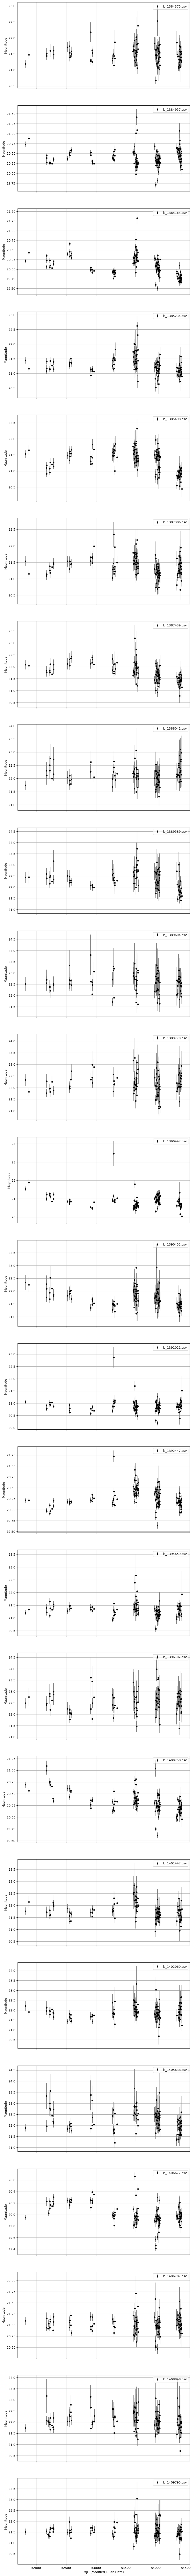

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder_path = '/Users/Teodora/OneDrive/Desktop/Test project/light_curves/'

# Get a list of all files in the specified folder
files = os.listdir(folder_path)

# Dictionary to store the DataFrames
dataframes = {}

# Iterate through the files and import them
for file_name in files:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Check if it's a file (not a subdirectory)
    if os.path.isfile(file_path):
        # Process the contents of the file as needed
        df = pd.read_csv(file_path)
        
        # Store the DataFrame in the dictionary with the key 'lc_' + file_name
        dataframes['lc_' + file_name] = df

# Create subplots
num_subplots = len(dataframes)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 6 * num_subplots), sharex=True)

# Loop over the created DataFrames in the 'dataframes' dictionary
for i, (key, df) in enumerate(dataframes.items()):
    # Plot the light curve with error bars
    axes[i].errorbar(df['mjd'], df['mag'], yerr=df['magerr'], fmt='o', color='black', ecolor='gray', markersize=4, label=key)
    axes[i].set_ylabel('Magnitude')
    axes[i].grid(True)
    axes[i].legend()

# Set common x-axis label
axes[-1].set_xlabel('MJD (Modified Julian Date)')

plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import describe
from scipy.stats import ttest_ind

In [5]:
for key, df in dataframes.items():
    print(f"\nQuasar {key} Statistics:")
    print(describe(df['mag']))


Quasar lc_1384375.csv Statistics:
DescribeResult(nobs=116, minmax=(20.67464256286621, 22.52831268310547), mean=21.484611609886432, variance=0.07176553239974091, skewness=0.6973551764564387, kurtosis=2.3543782126872514)

Quasar lc_1384957.csv Statistics:
DescribeResult(nobs=143, minmax=(19.7080135345459, 21.41363906860352), mean=20.394023175006147, variance=0.04738640746827923, skewness=1.0358123299804811, kurtosis=4.201651808184206)

Quasar lc_1385163.csv Statistics:
DescribeResult(nobs=141, minmax=(19.507198333740234, 21.327890396118164), mean=20.065889588484527, variance=0.07143866951895814, skewness=0.8591070322447867, kurtosis=2.4057455244287382)

Quasar lc_1385234.csv Statistics:
DescribeResult(nobs=137, minmax=(20.52115821838379, 22.619121551513672), mean=21.27190285007449, variance=0.09081208690651796, skewness=1.026999202762776, kurtosis=2.9810318624752705)

Quasar lc_1385498.csv Statistics:
DescribeResult(nobs=151, minmax=(20.447572708129883, 22.318246841430664), mean=21.3042

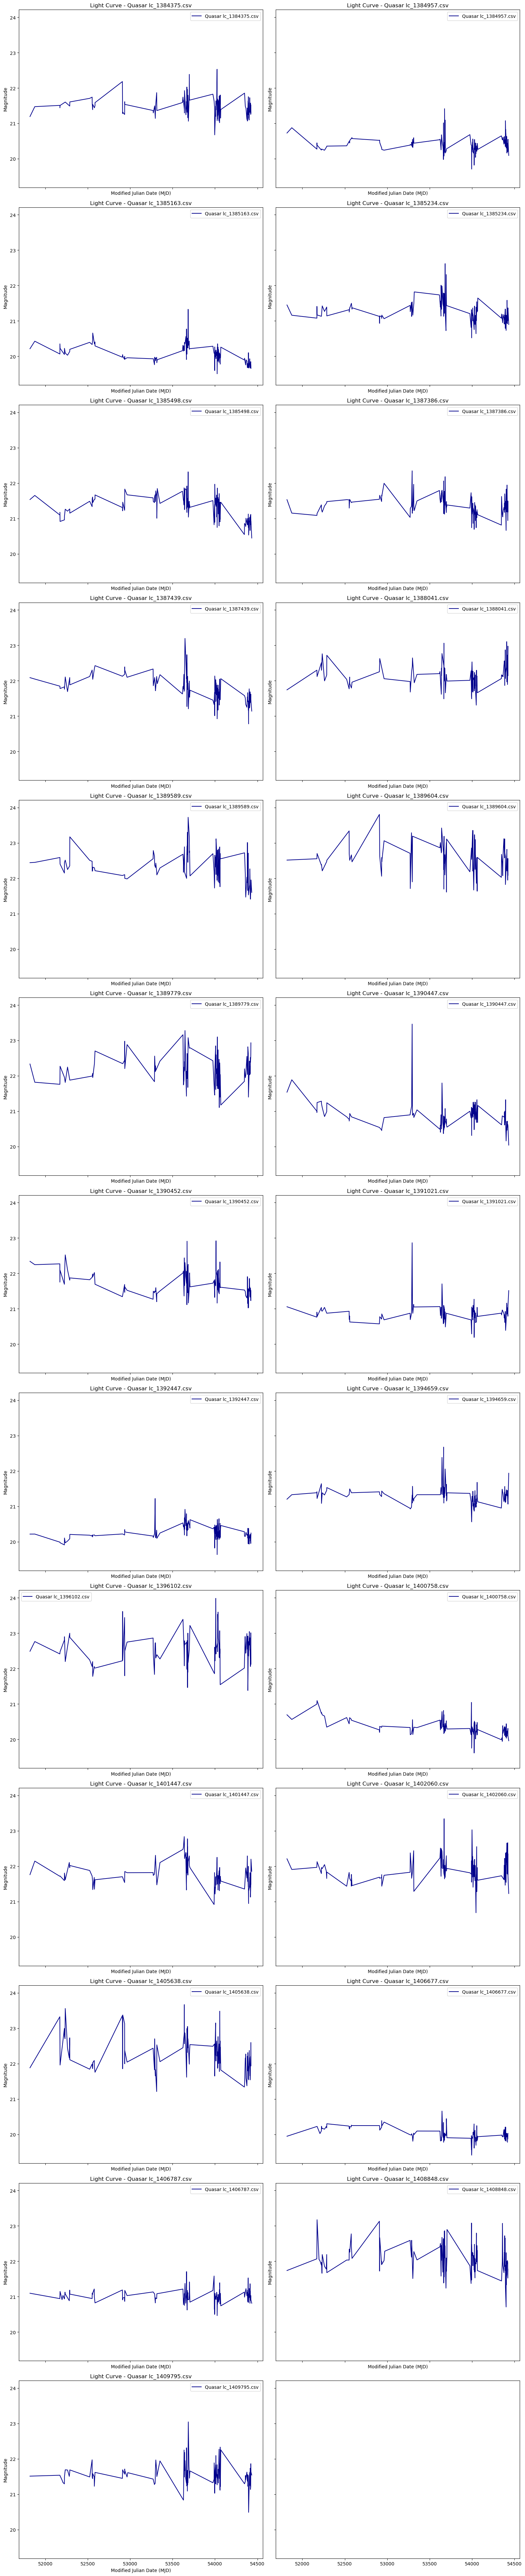

In [6]:
import matplotlib.pyplot as plt

# Determine the number of subplots needed (assuming even number of quasars)
num_quasars = len(dataframes)
num_subplots = num_quasars // 2 + num_quasars % 2  # Calculationg the number of subplots

# Create subplots with 2 columns
fig, axes = plt.subplots(num_subplots, 2, figsize=(16, 6 * num_subplots), sharex=True, sharey=True)

# Flatten the 2D array of axes to simplify indexing
axes = axes.flatten()

# Loop over the created DataFrames in the 'dataframes' dictionary
for i, (key, df) in enumerate(dataframes.items()):
    # Plot the light curve with a label in the appropriate subplot
    axes[i].plot(df['mjd'], df['mag'], label=f'Quasar {key}',color='darkblue')
    
    # Set labels and title for each subplot
    axes[i].set_xlabel('Modified Julian Date (MJD)')
    axes[i].set_ylabel('Magnitude')
    axes[i].set_title(f'Light Curve - Quasar {key}')
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

In [7]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your dictionary is named light_curves_dict
# The keys are the names of the light curves, and the values are DataFrames

# Perform t-test for all pairs of light curves
for curve_name1, data1 in dataframes.items():
    for curve_name2, data2 in dataframes.items():
        if curve_name1 != curve_name2:  # Avoid comparing the same light curve
            # Assuming 'mag' is the column containing magnitude data
            result = ttest_ind(data1['mag'], data2['mag'])
            p_value = result.pvalue

            # Print the comparison and the result
            print(f"T-test p-value between {curve_name1} and {curve_name2}: {p_value}")

            # Check for significance
            if p_value < 0.05:
                print(f"There is a significant difference between {curve_name1} and {curve_name2}.\n")
            else:
                print(f"There is not enough evidence to claim a significant difference between {curve_name1} and {curve_name2}.\n")
            
                

T-test p-value between lc_1384375.csv and lc_1384957.csv: 9.167145806500244e-103
There is a significant difference between lc_1384375.csv and lc_1384957.csv.

T-test p-value between lc_1384375.csv and lc_1385163.csv: 2.9064812570428773e-117
There is a significant difference between lc_1384375.csv and lc_1385163.csv.

T-test p-value between lc_1384375.csv and lc_1385234.csv: 1.2743017239186235e-08
There is a significant difference between lc_1384375.csv and lc_1385234.csv.

T-test p-value between lc_1384375.csv and lc_1385498.csv: 3.2366932959419186e-06
There is a significant difference between lc_1384375.csv and lc_1385498.csv.

T-test p-value between lc_1384375.csv and lc_1387386.csv: 0.0020703698153231344
There is a significant difference between lc_1384375.csv and lc_1387386.csv.

T-test p-value between lc_1384375.csv and lc_1387439.csv: 9.27517400068233e-09
There is a significant difference between lc_1384375.csv and lc_1387439.csv.

T-test p-value between lc_1384375.csv and lc_138

Similar curves are: lc_1384375.csv and lc_1409795.csv.



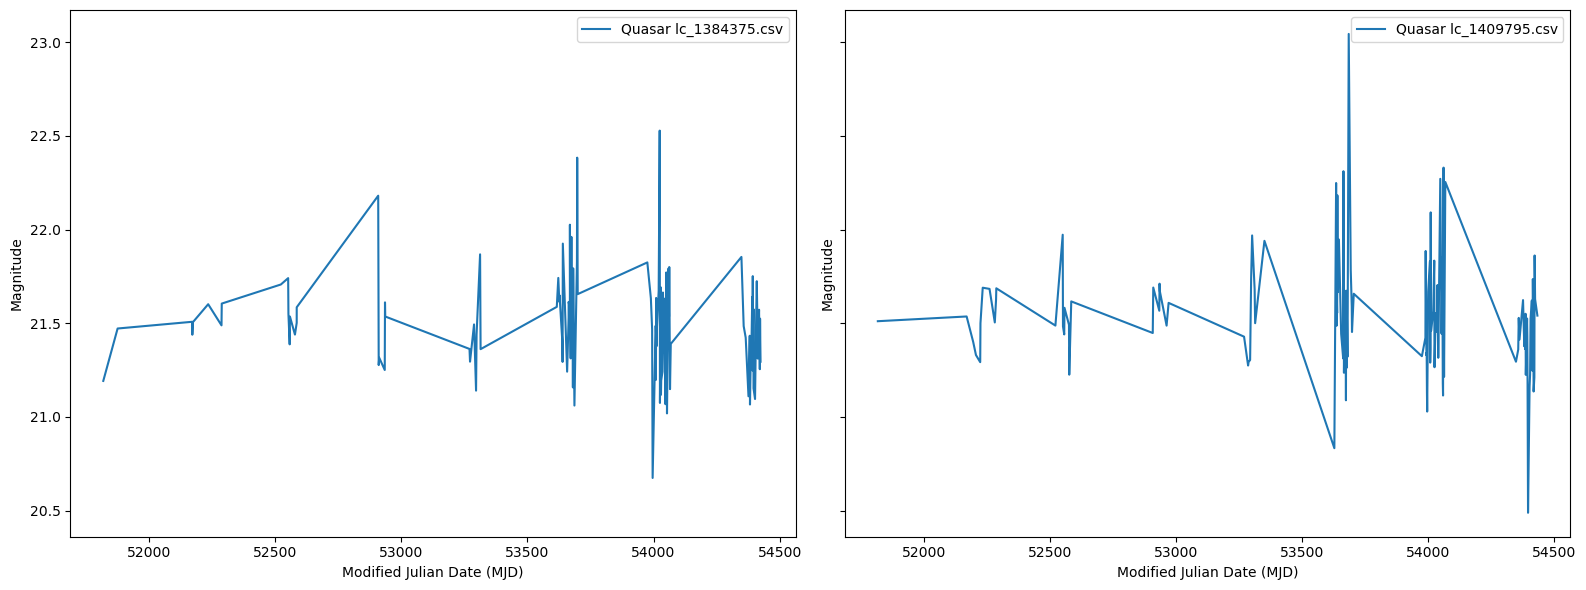

Similar curves are: lc_1385234.csv and lc_1385498.csv.



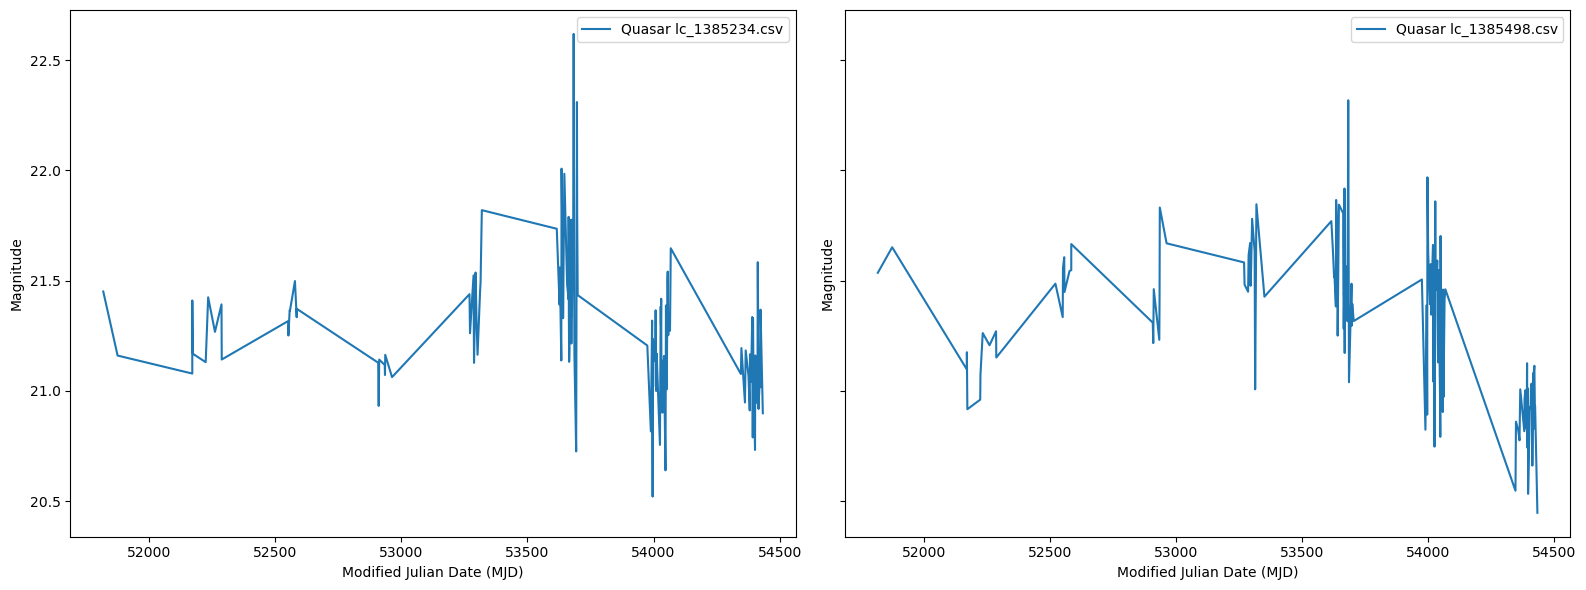

Similar curves are: lc_1385234.csv and lc_1394659.csv.



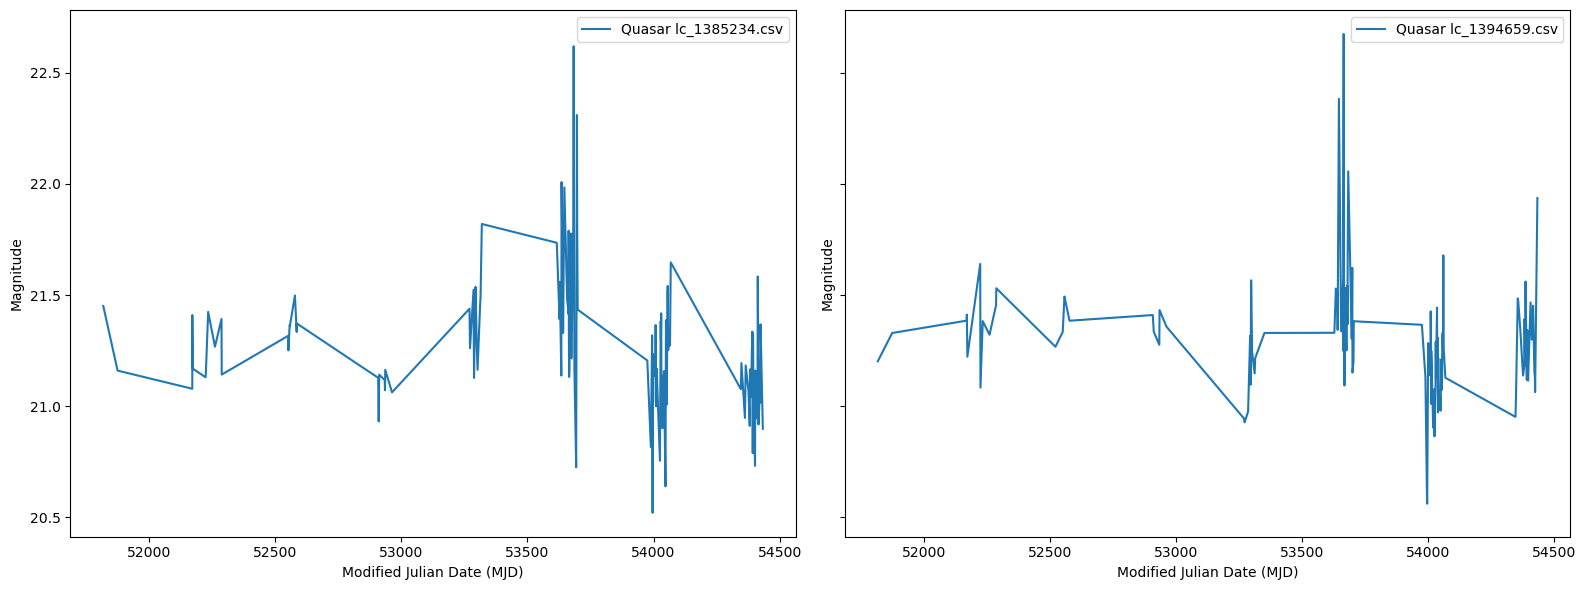

Similar curves are: lc_1385498.csv and lc_1385234.csv.



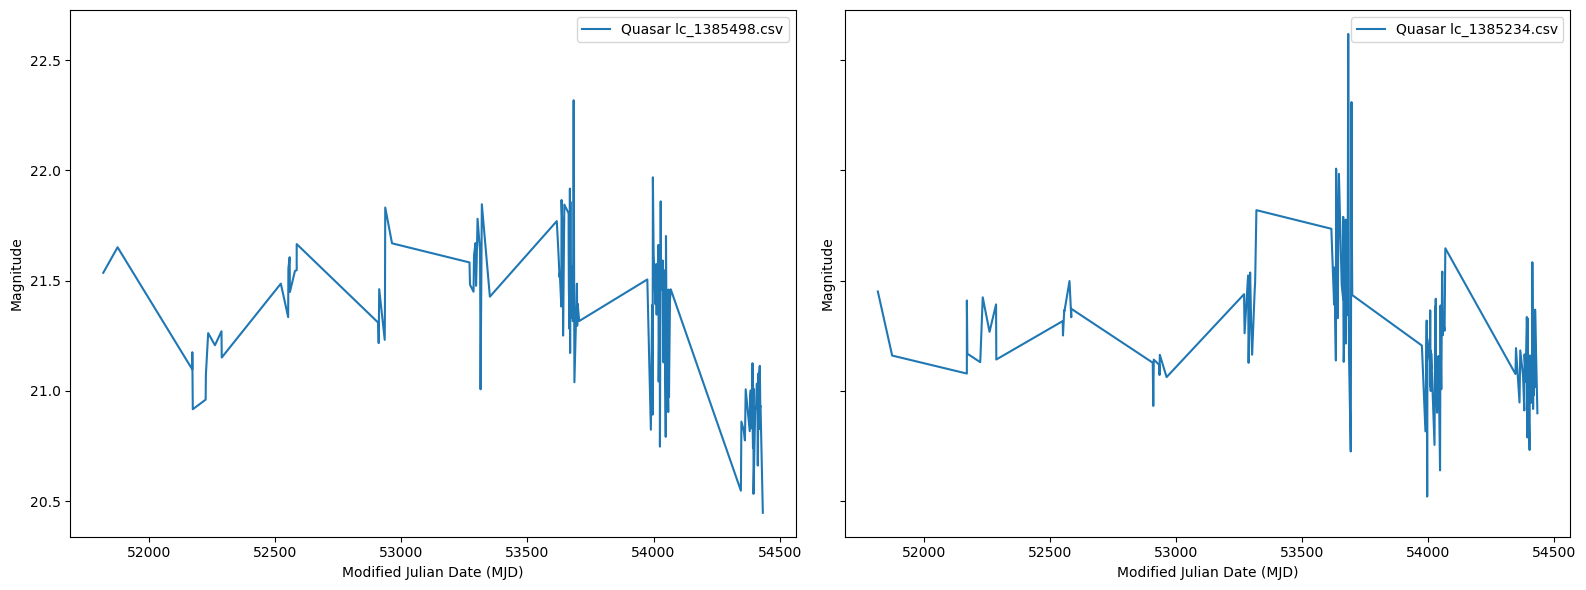

Similar curves are: lc_1385498.csv and lc_1394659.csv.



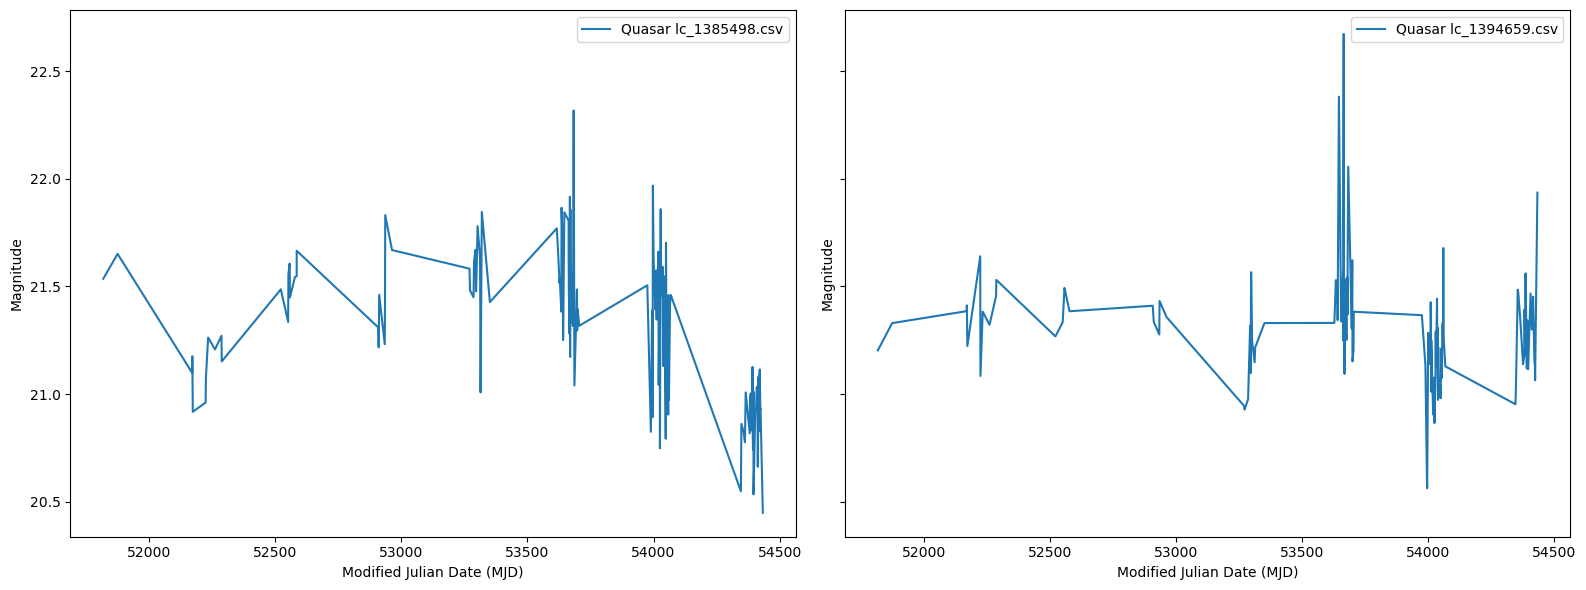

Similar curves are: lc_1387386.csv and lc_1394659.csv.



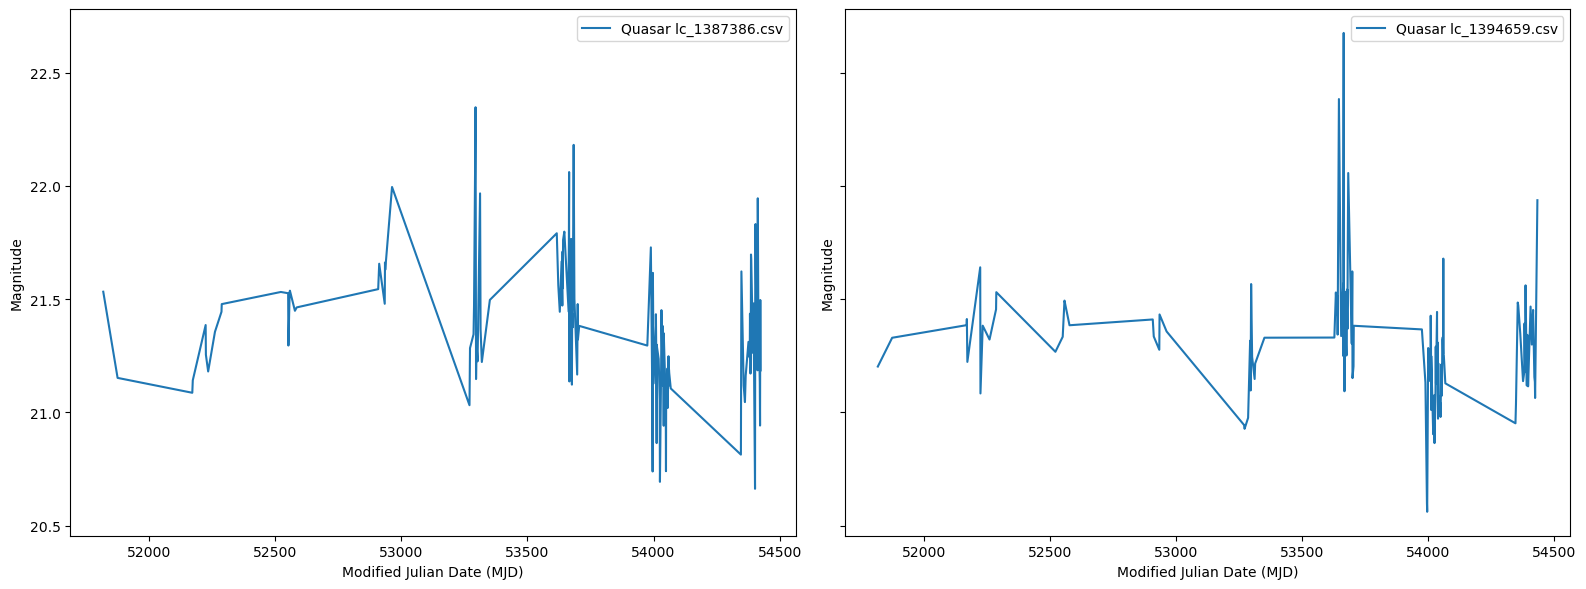

Similar curves are: lc_1387439.csv and lc_1390452.csv.



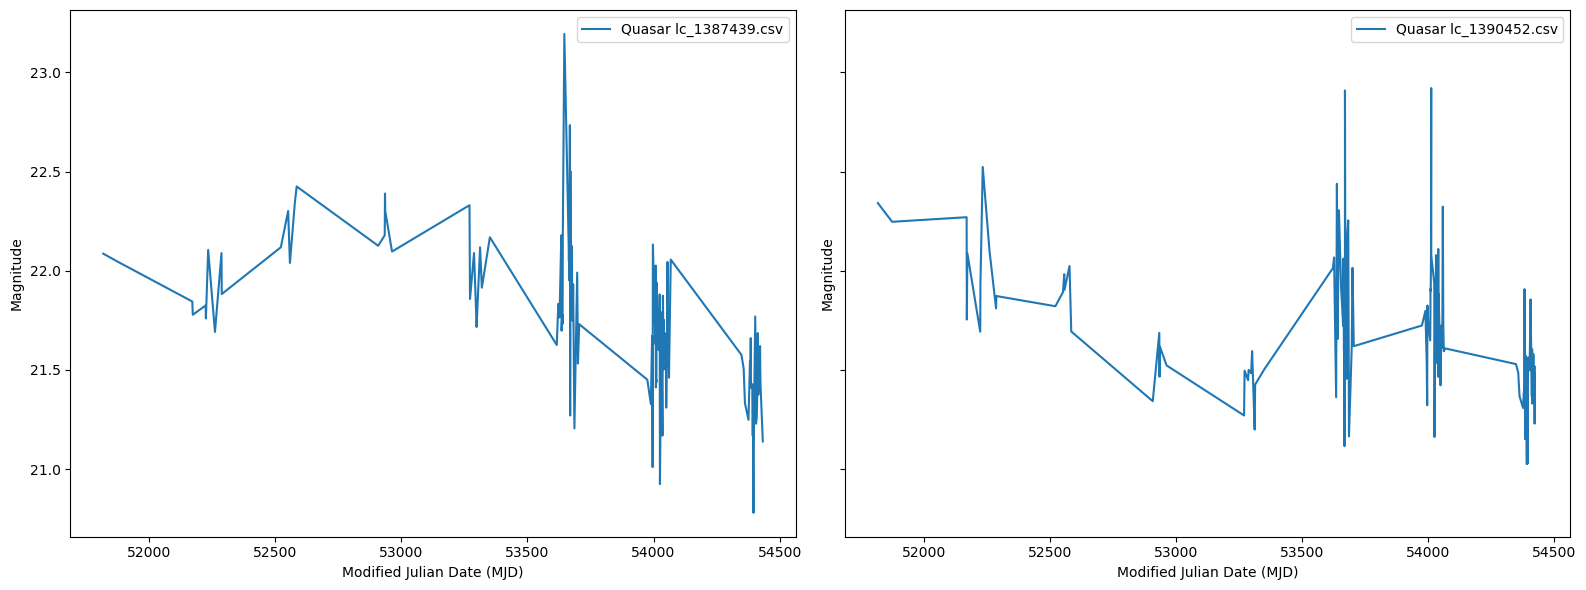

Similar curves are: lc_1387439.csv and lc_1401447.csv.



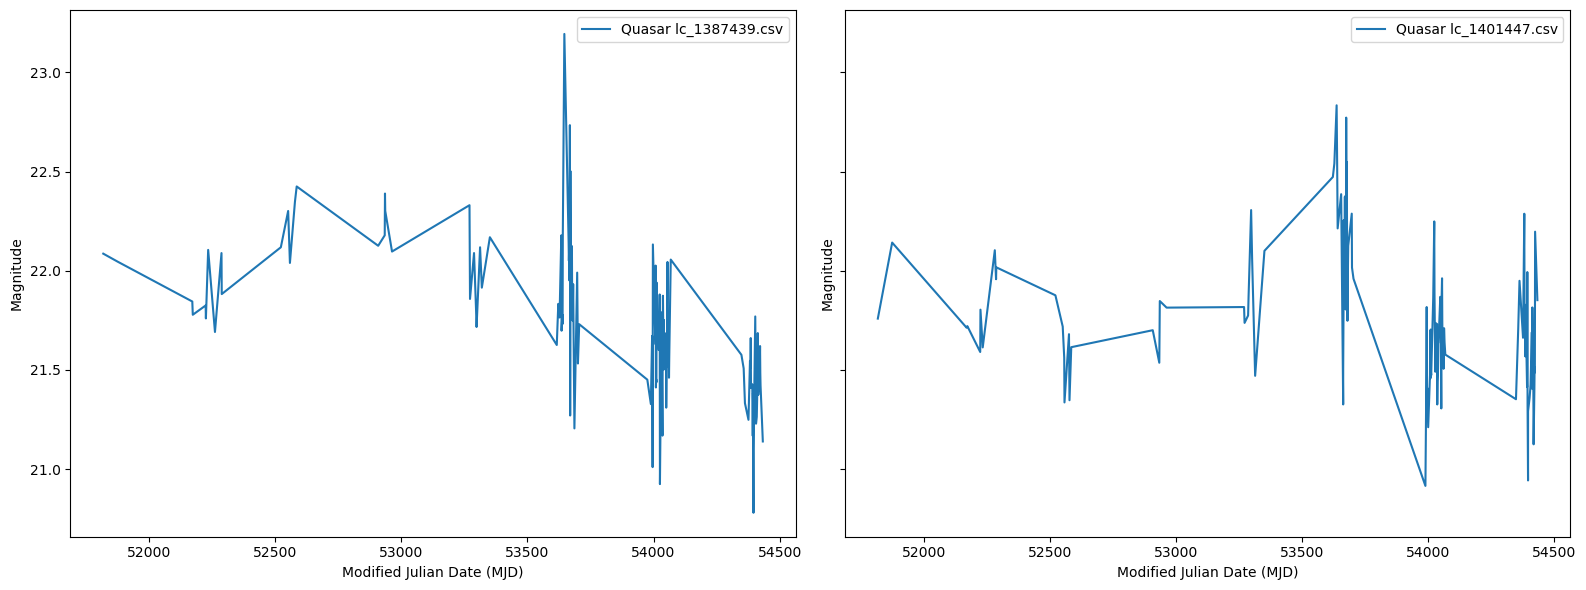

Similar curves are: lc_1388041.csv and lc_1389779.csv.



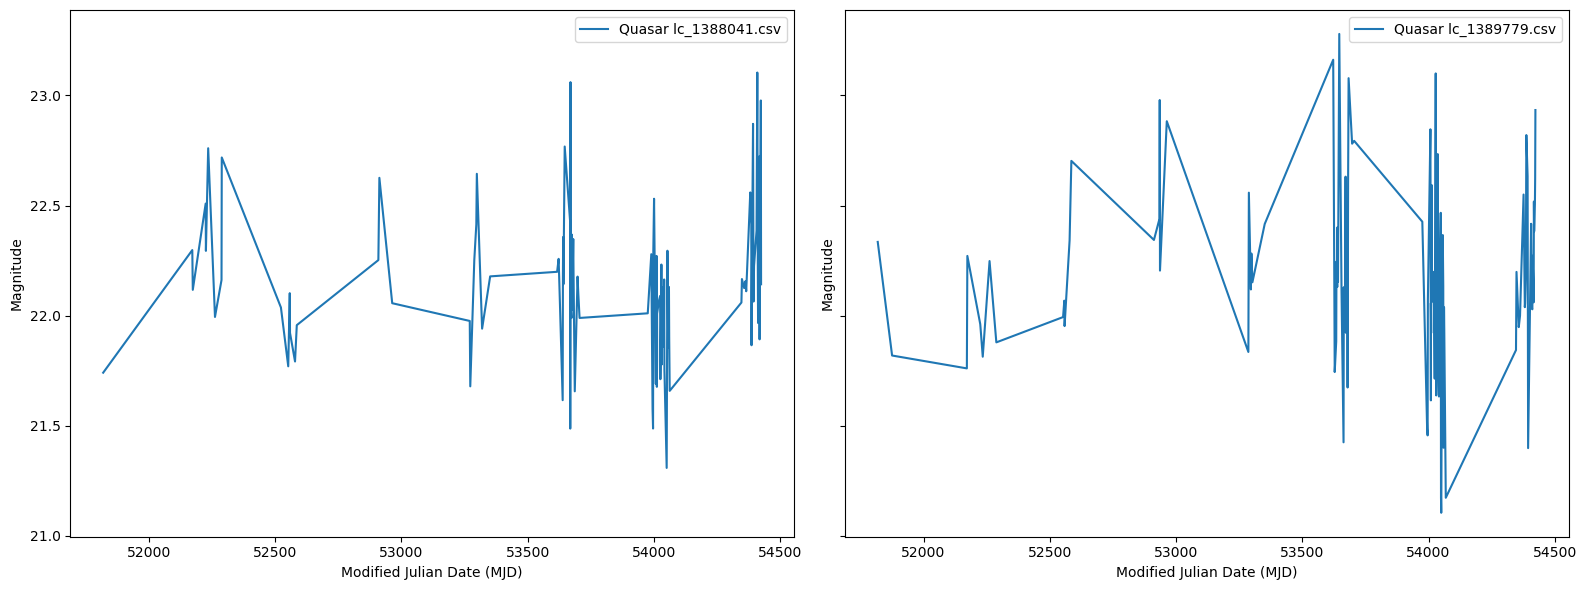

Similar curves are: lc_1388041.csv and lc_1408848.csv.



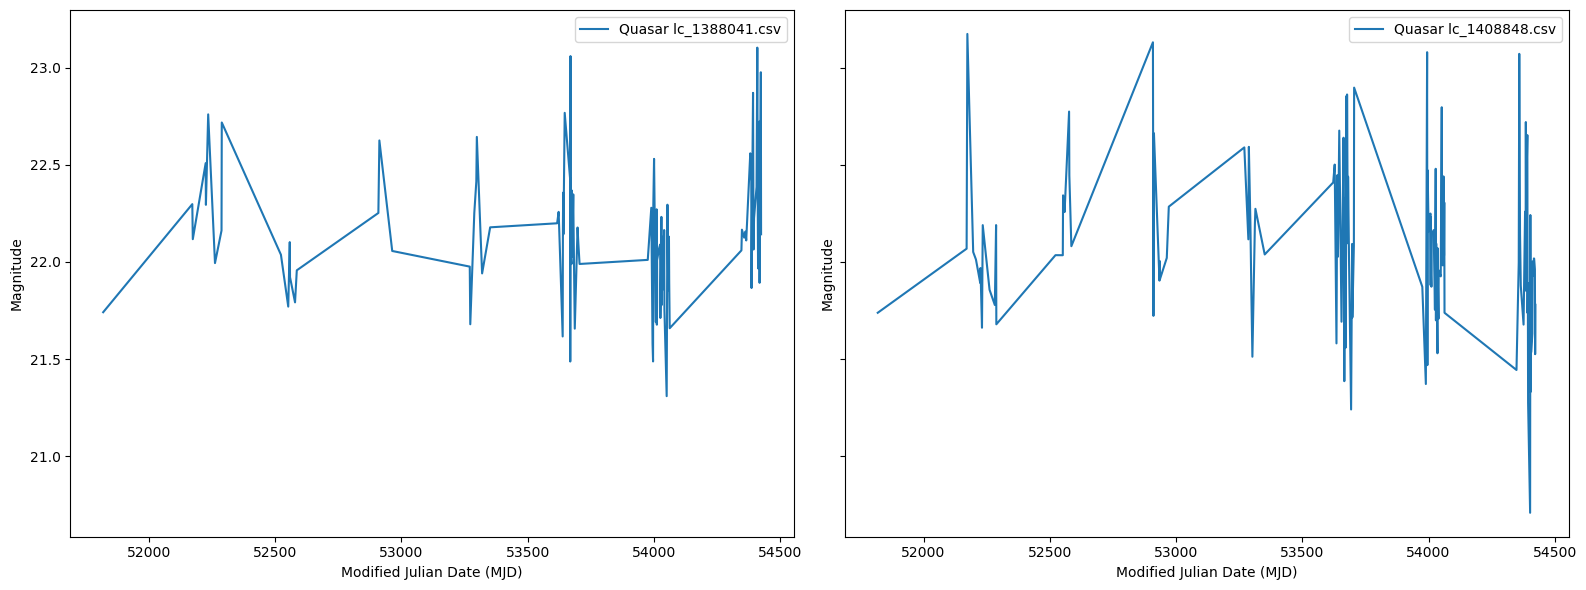

Similar curves are: lc_1389589.csv and lc_1405638.csv.



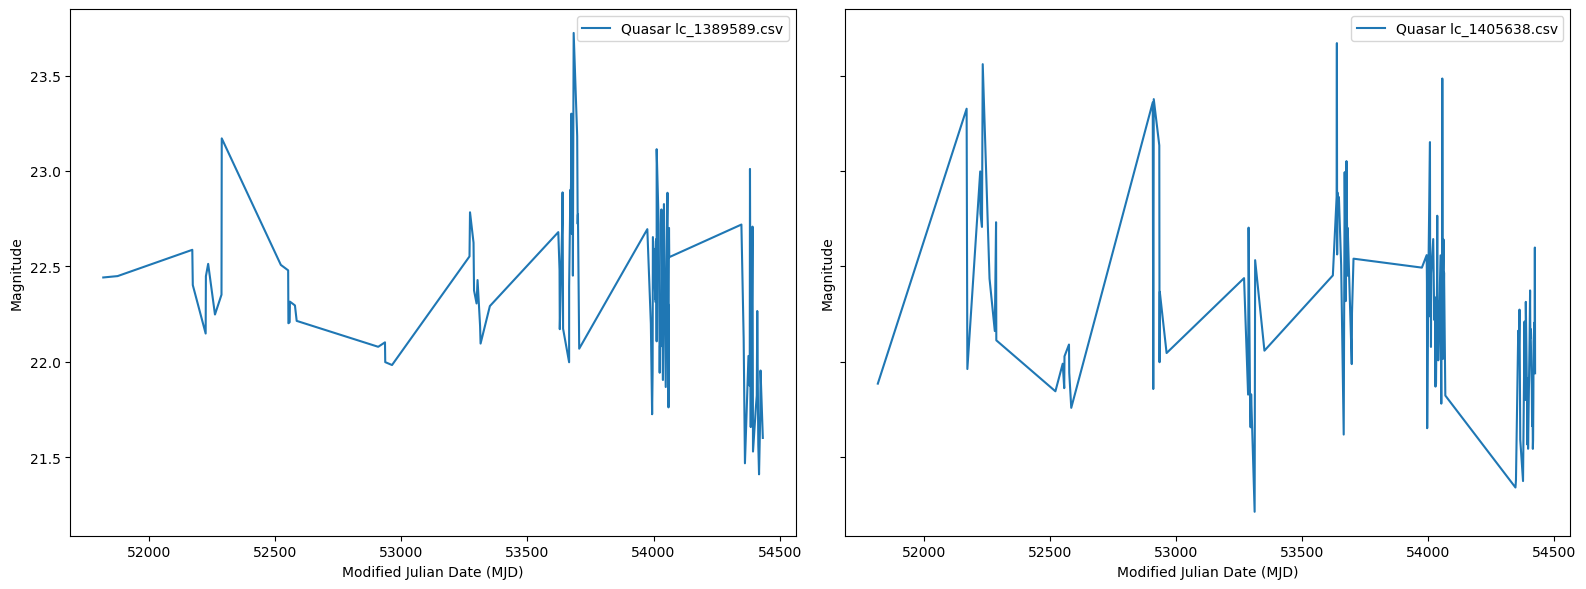

Similar curves are: lc_1389604.csv and lc_1396102.csv.



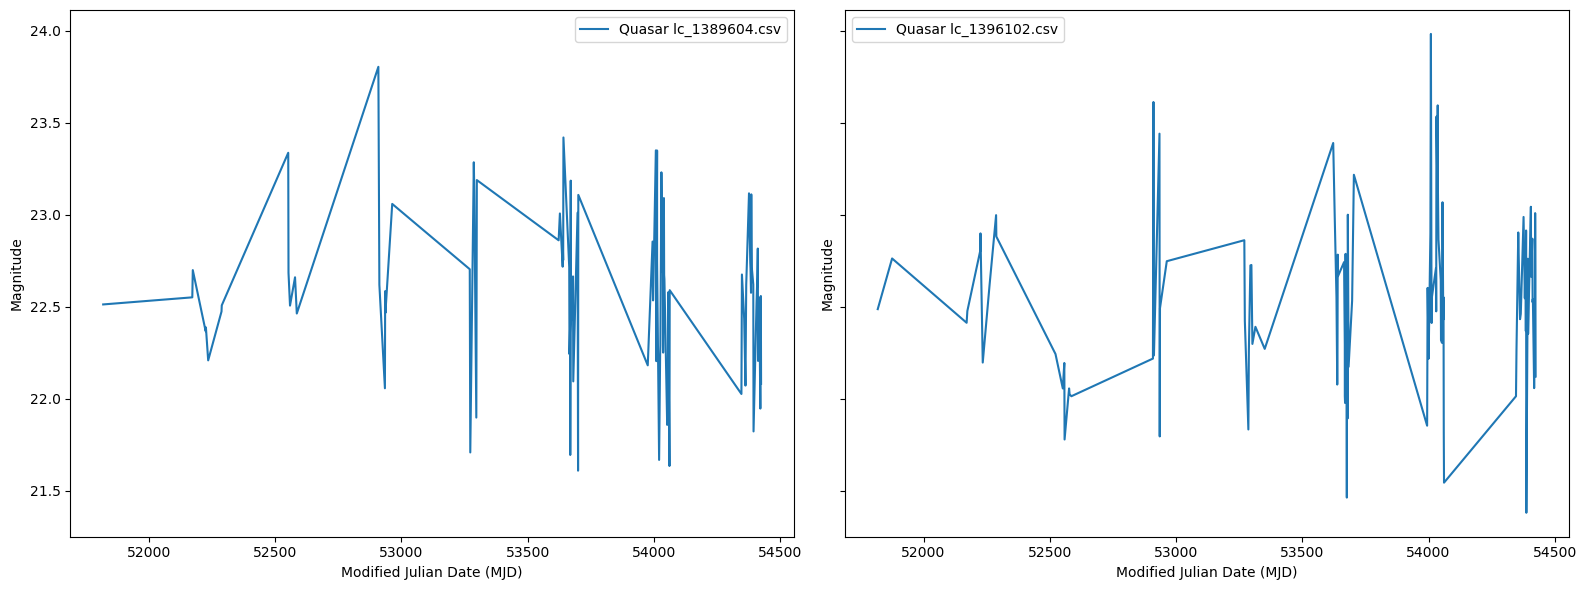

Similar curves are: lc_1389779.csv and lc_1388041.csv.



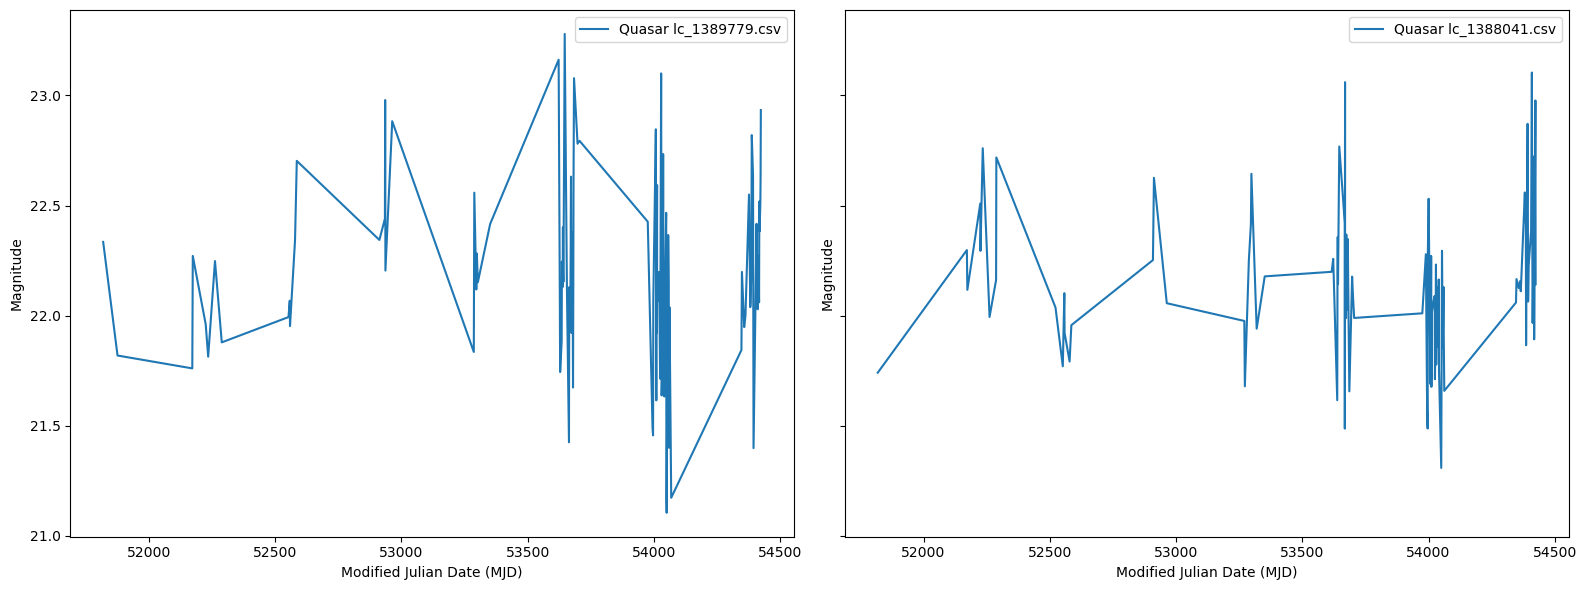

Similar curves are: lc_1389779.csv and lc_1405638.csv.



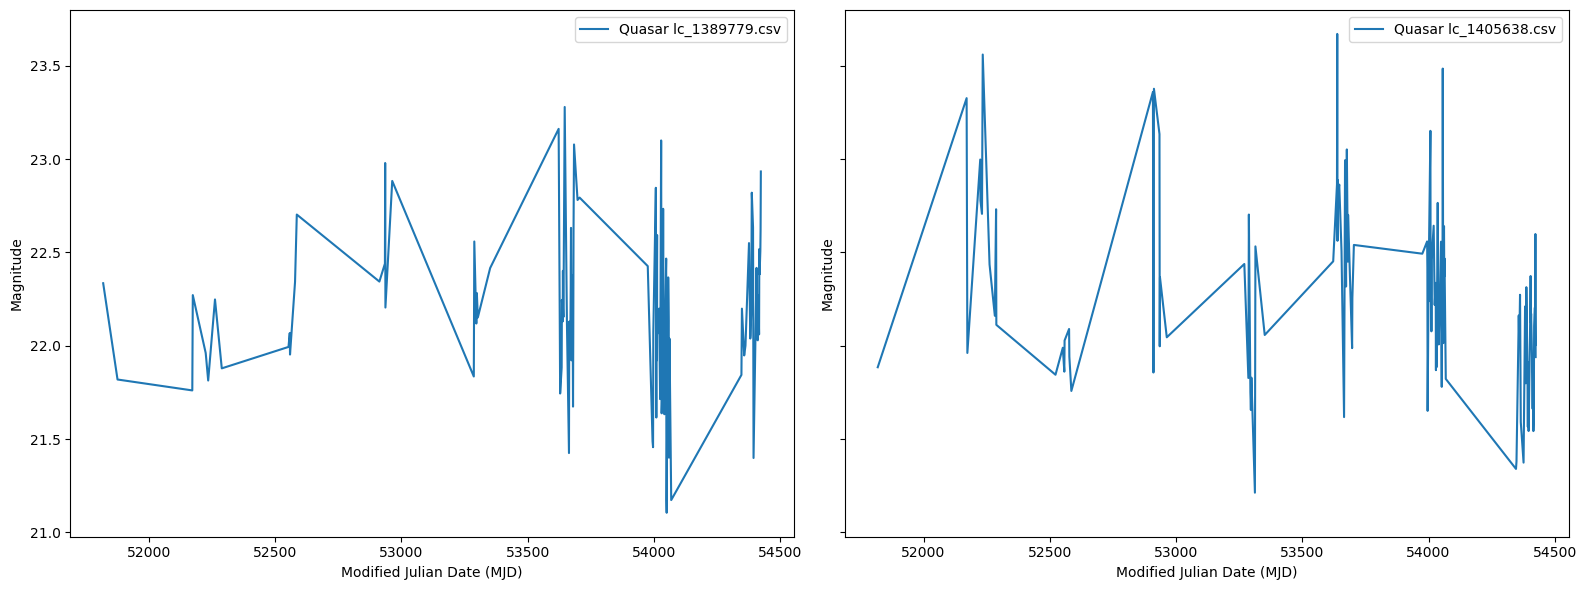

Similar curves are: lc_1389779.csv and lc_1408848.csv.



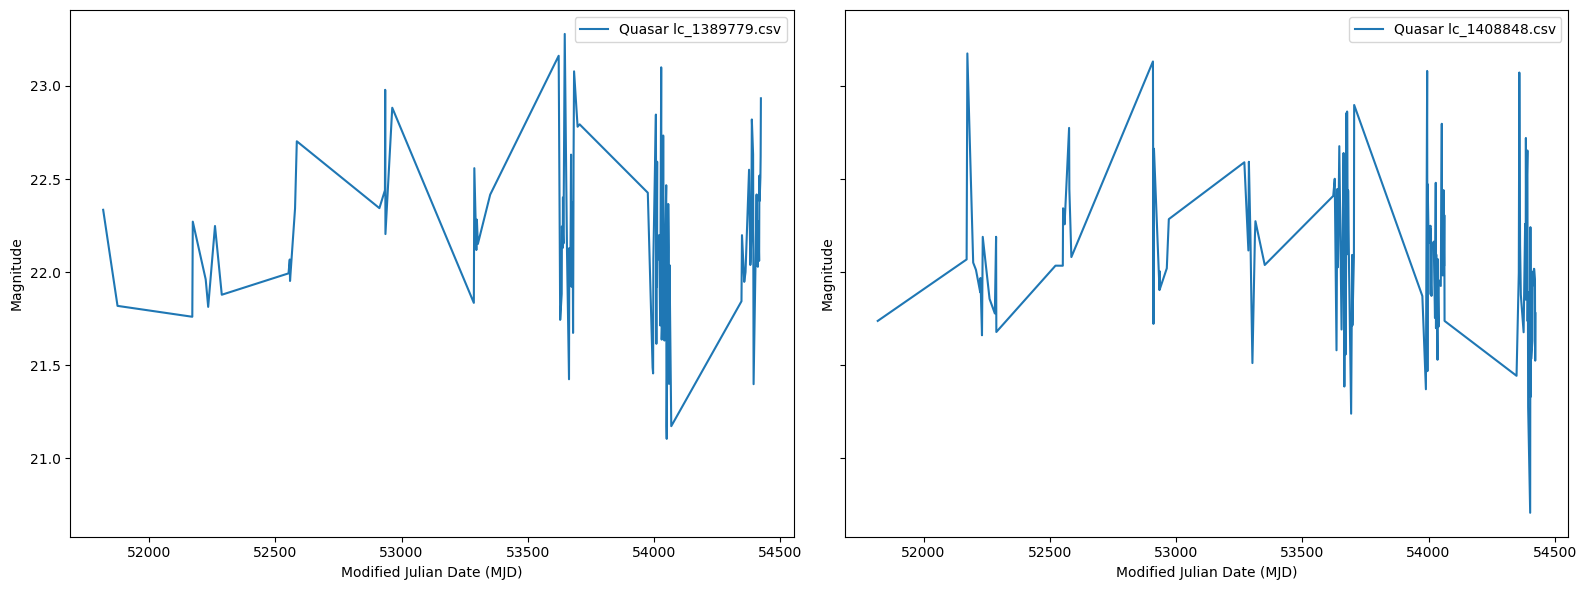

Similar curves are: lc_1390447.csv and lc_1391021.csv.



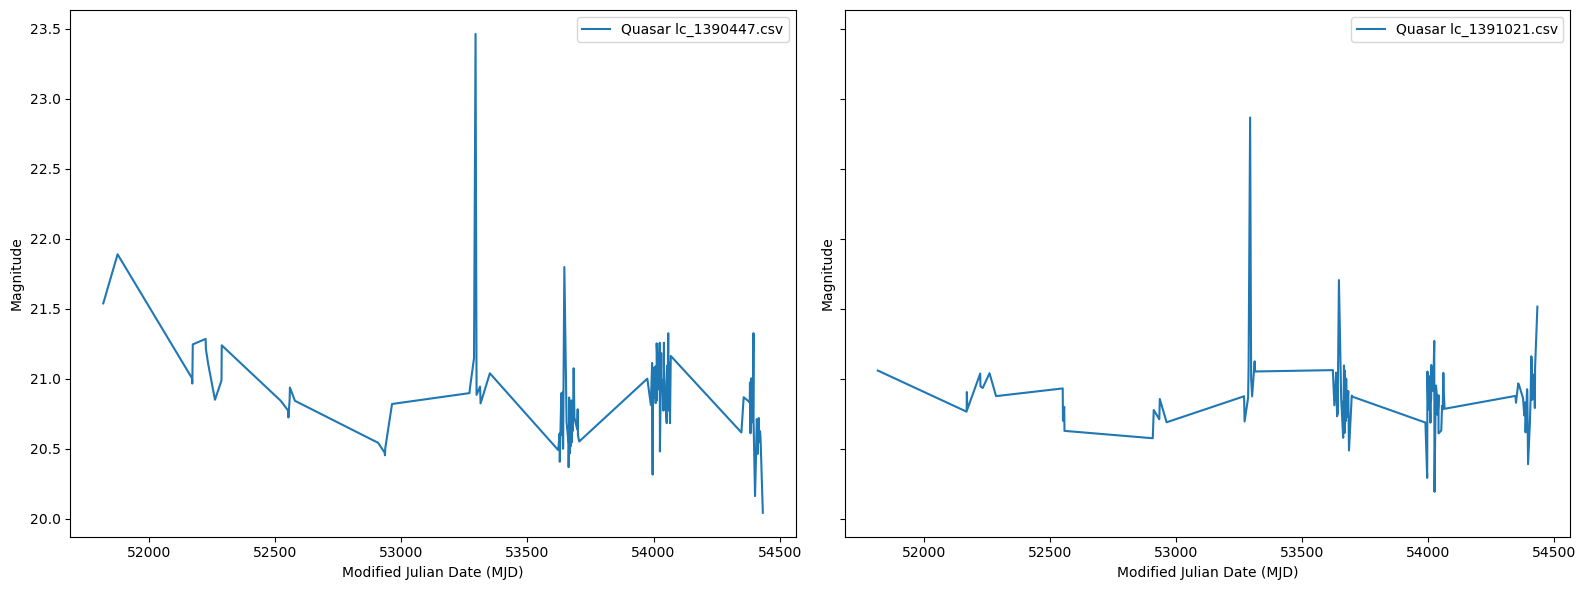

Similar curves are: lc_1390452.csv and lc_1387439.csv.



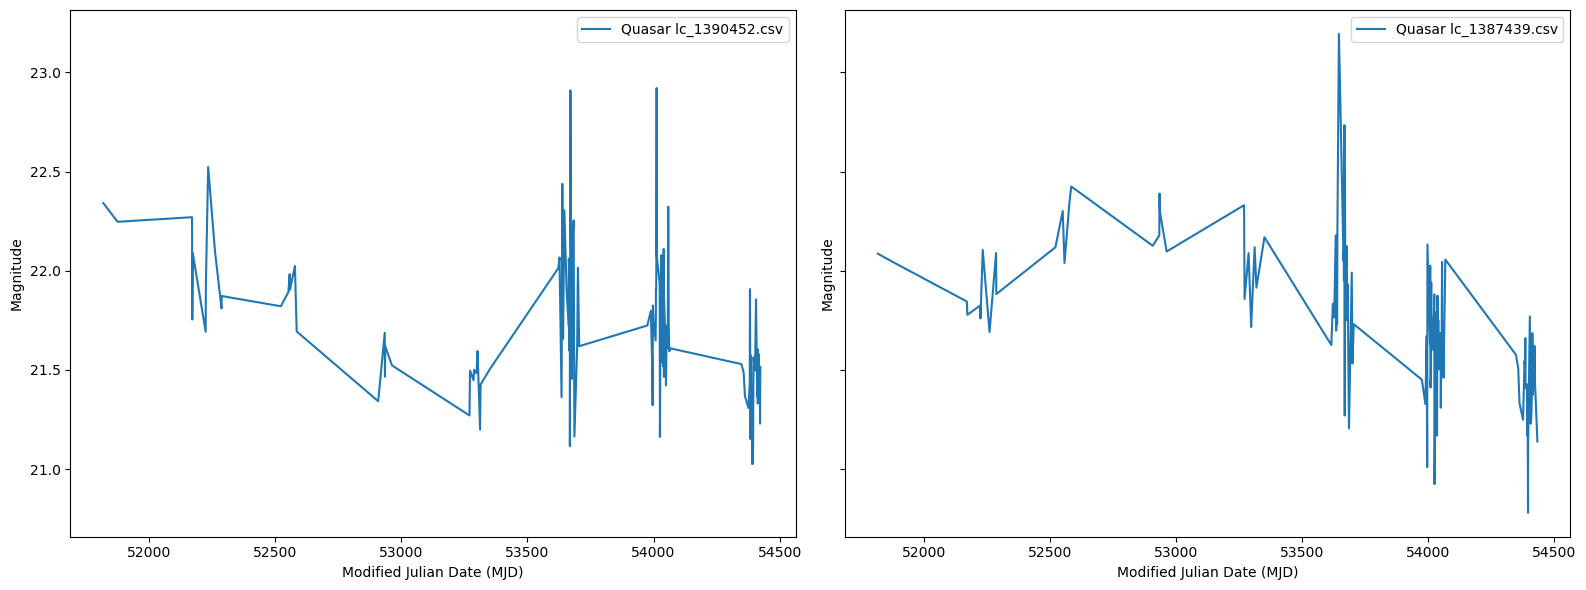

Similar curves are: lc_1390452.csv and lc_1401447.csv.



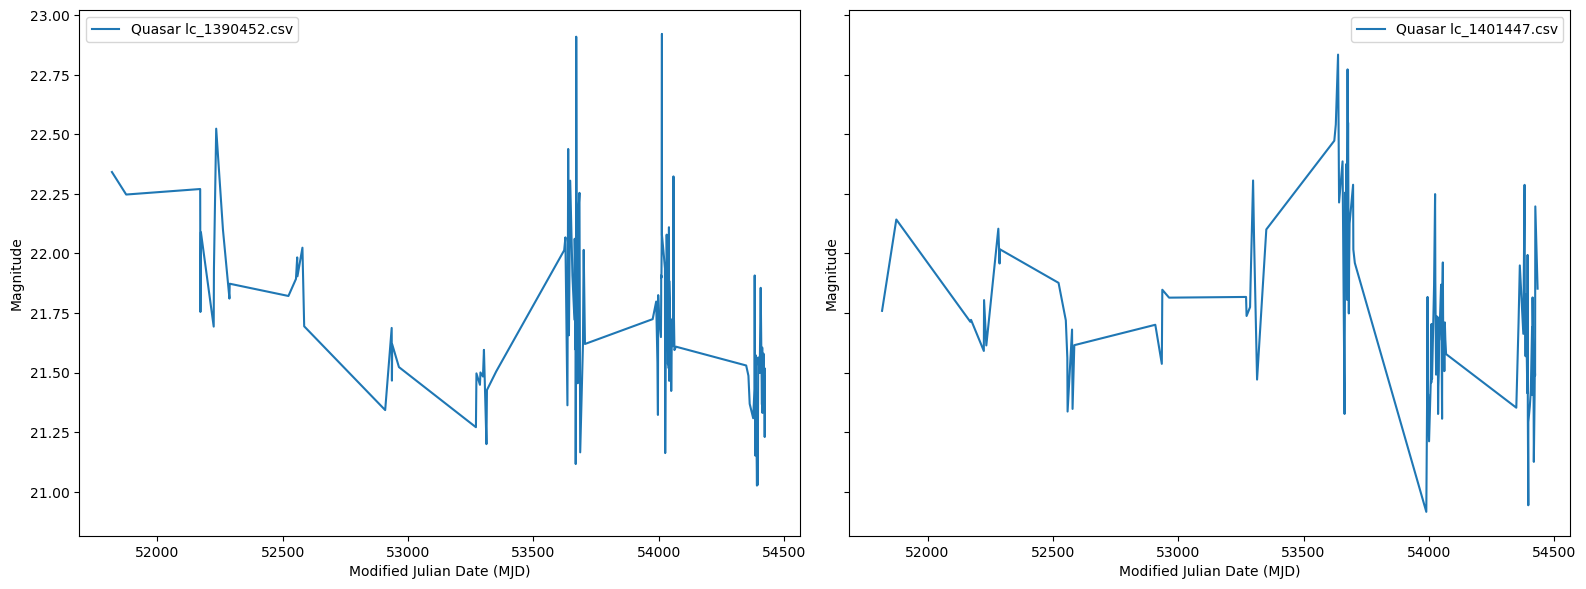

Similar curves are: lc_1391021.csv and lc_1390447.csv.



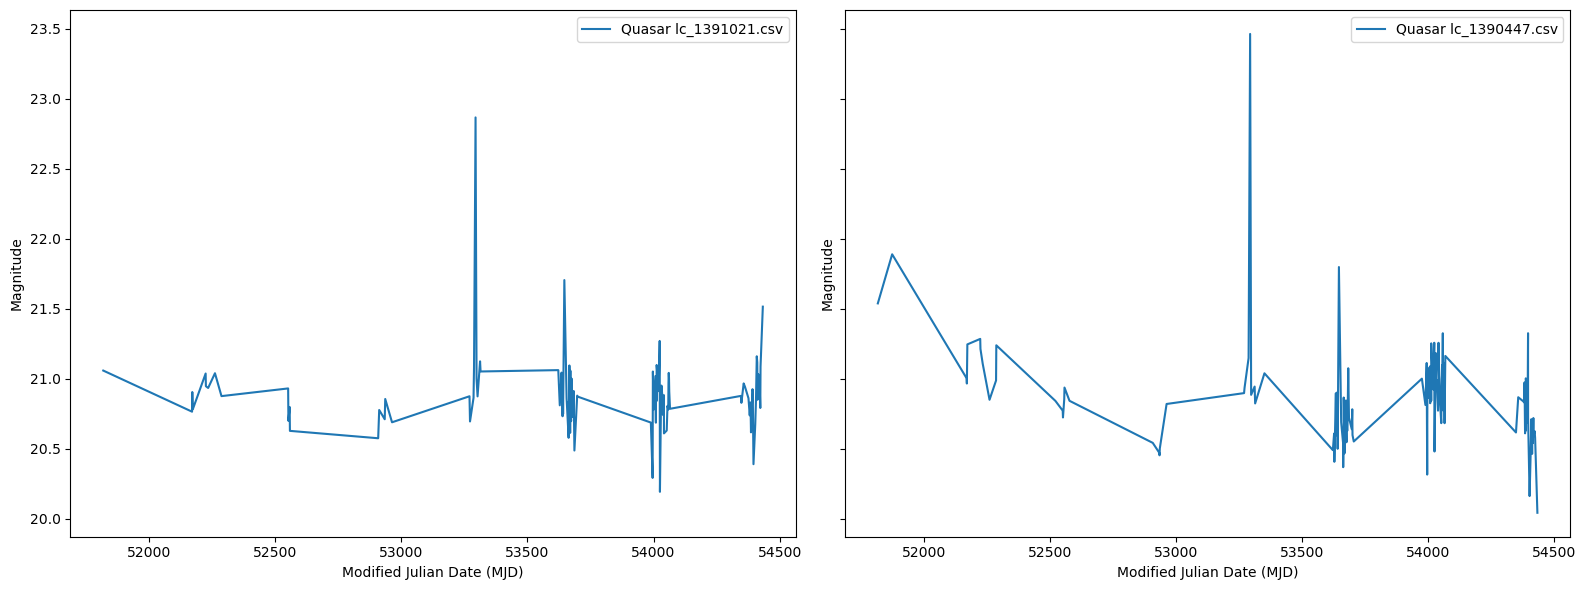

Similar curves are: lc_1394659.csv and lc_1385234.csv.



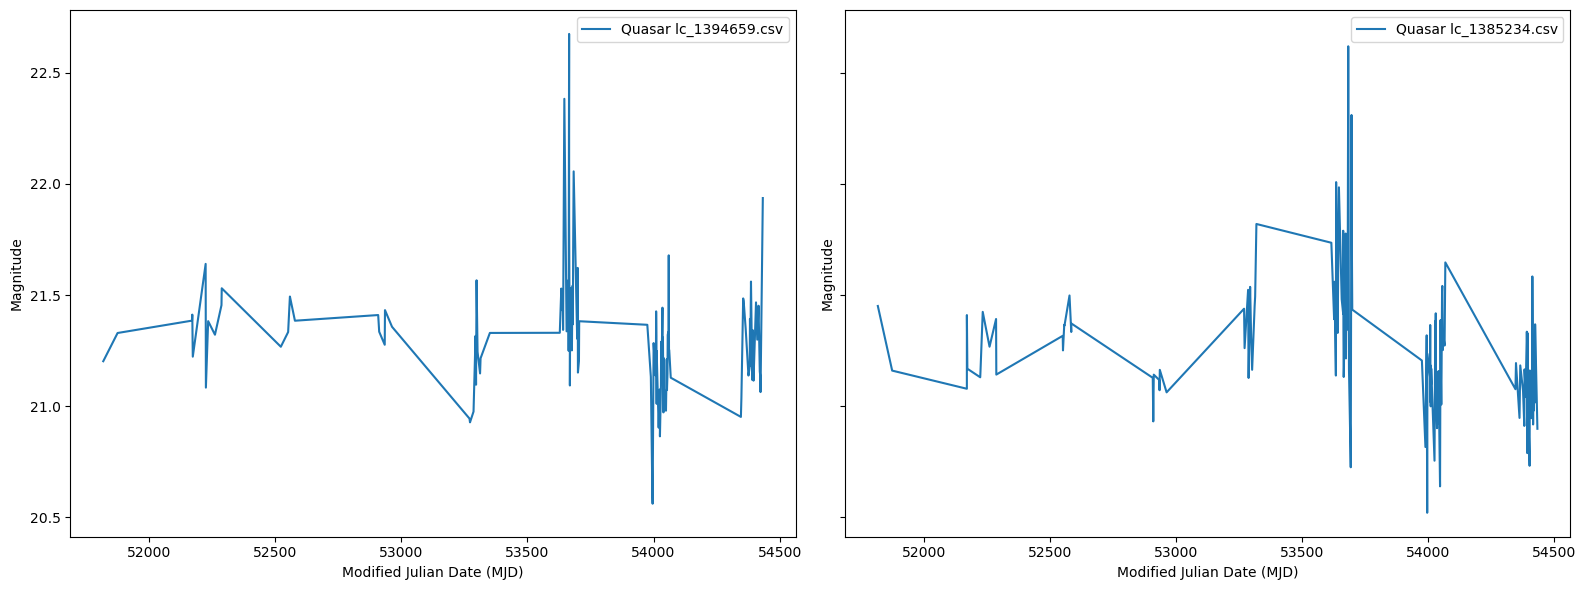

Similar curves are: lc_1394659.csv and lc_1385498.csv.



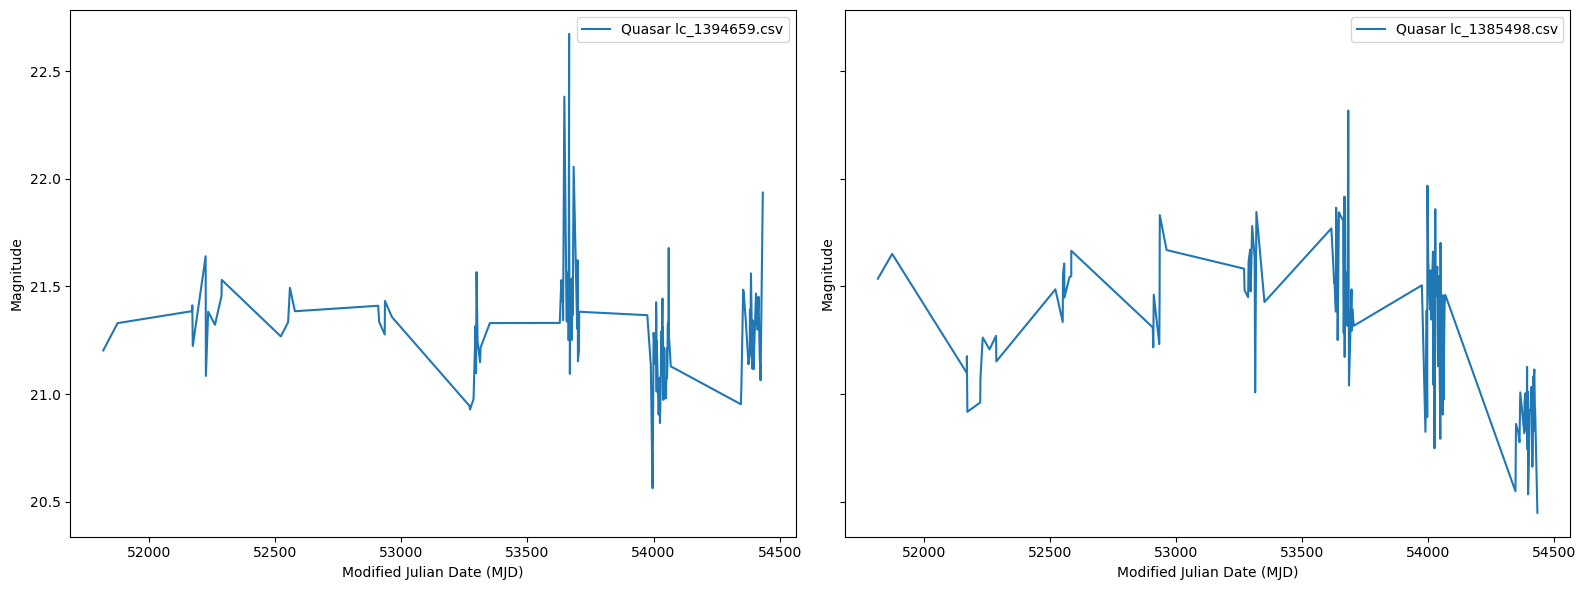

Similar curves are: lc_1394659.csv and lc_1387386.csv.



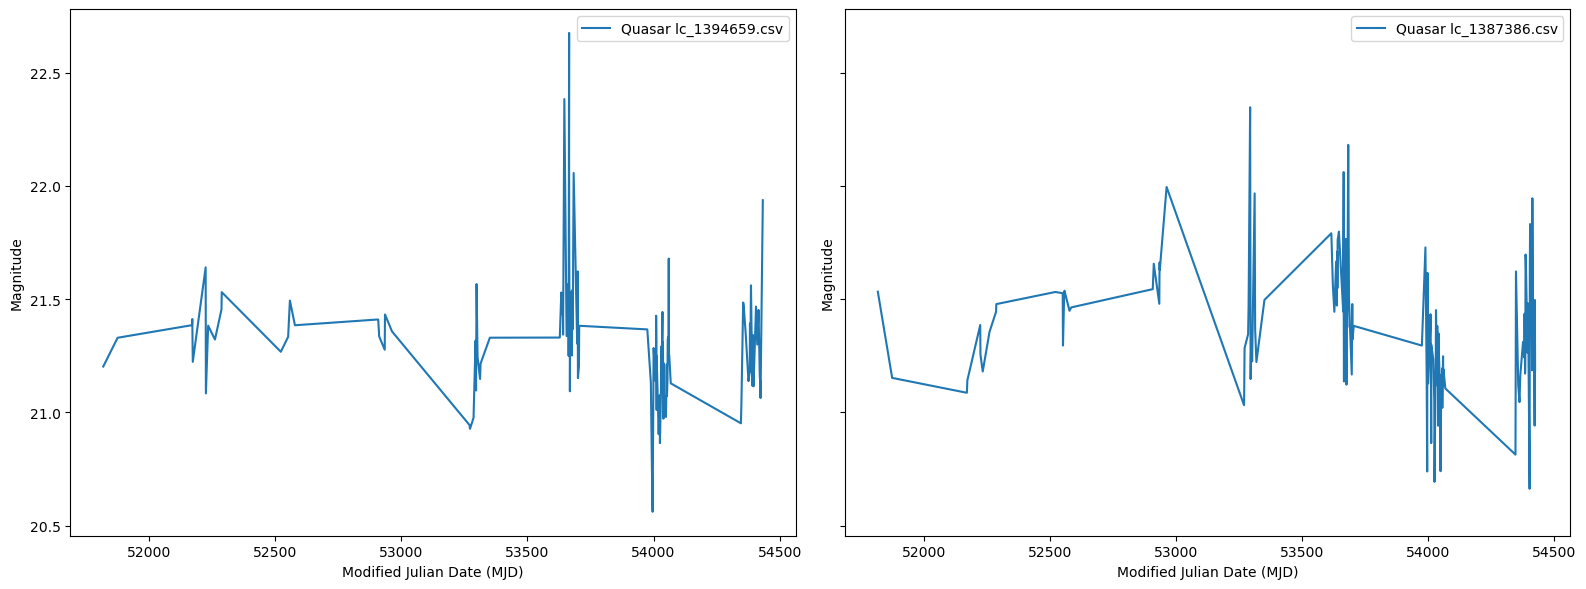

Similar curves are: lc_1396102.csv and lc_1389604.csv.



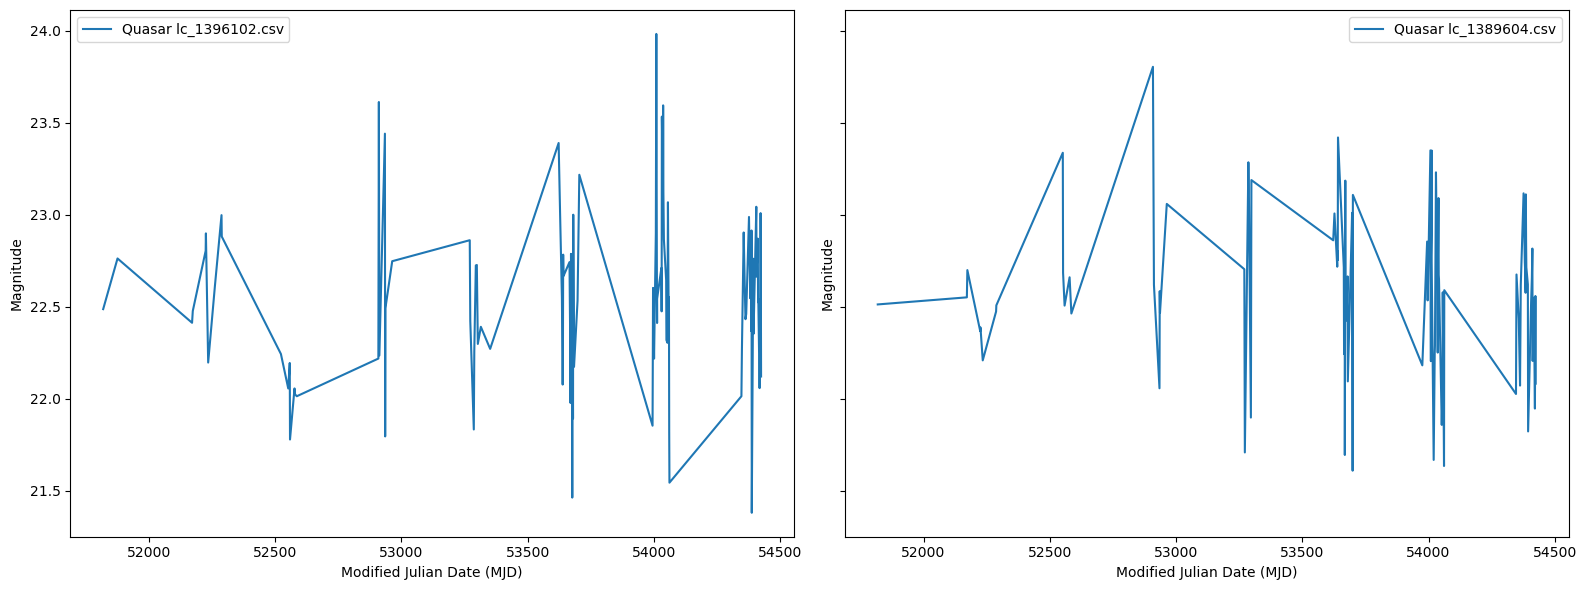

Similar curves are: lc_1401447.csv and lc_1387439.csv.



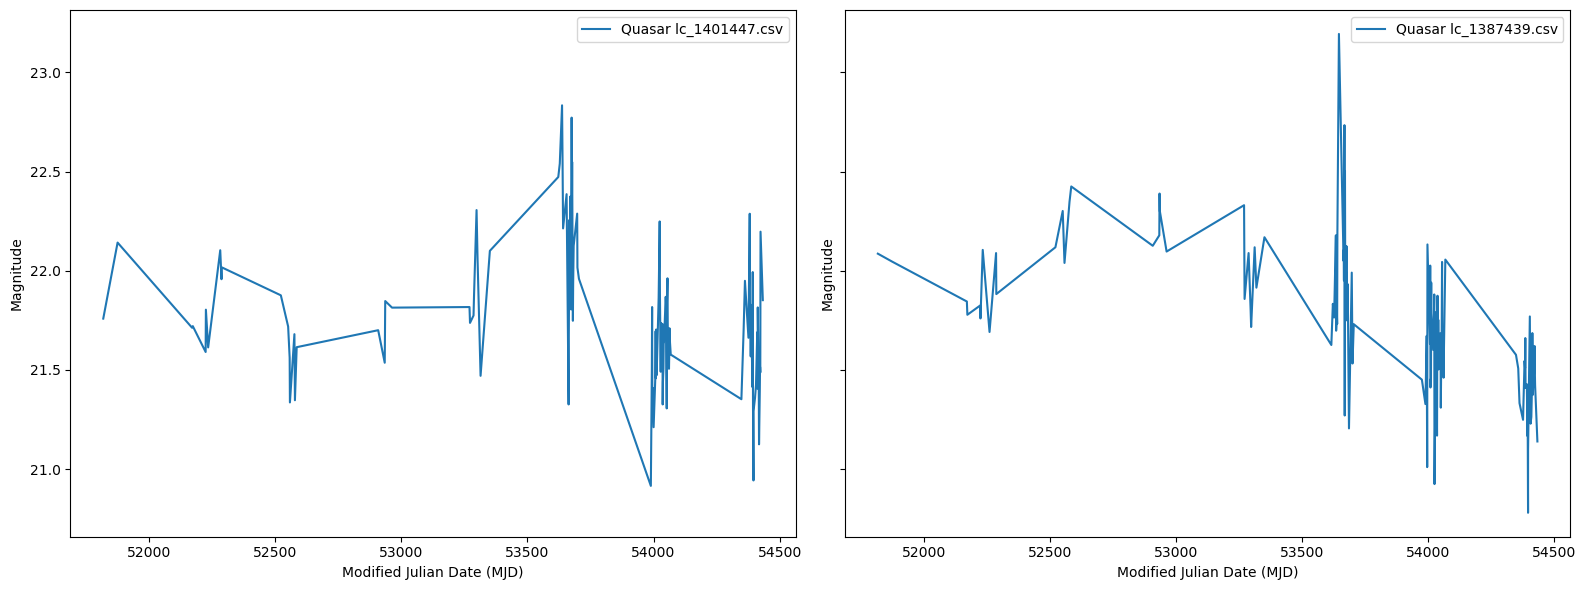

Similar curves are: lc_1401447.csv and lc_1390452.csv.



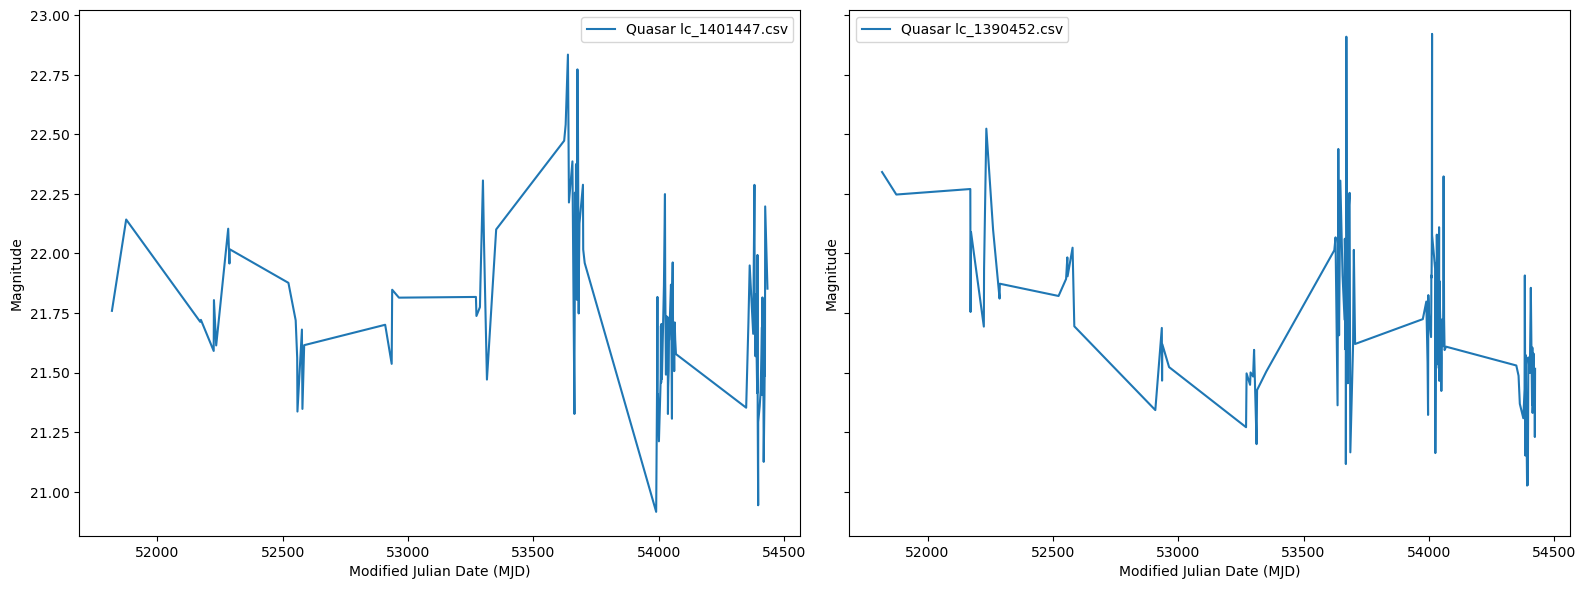

Similar curves are: lc_1405638.csv and lc_1389589.csv.



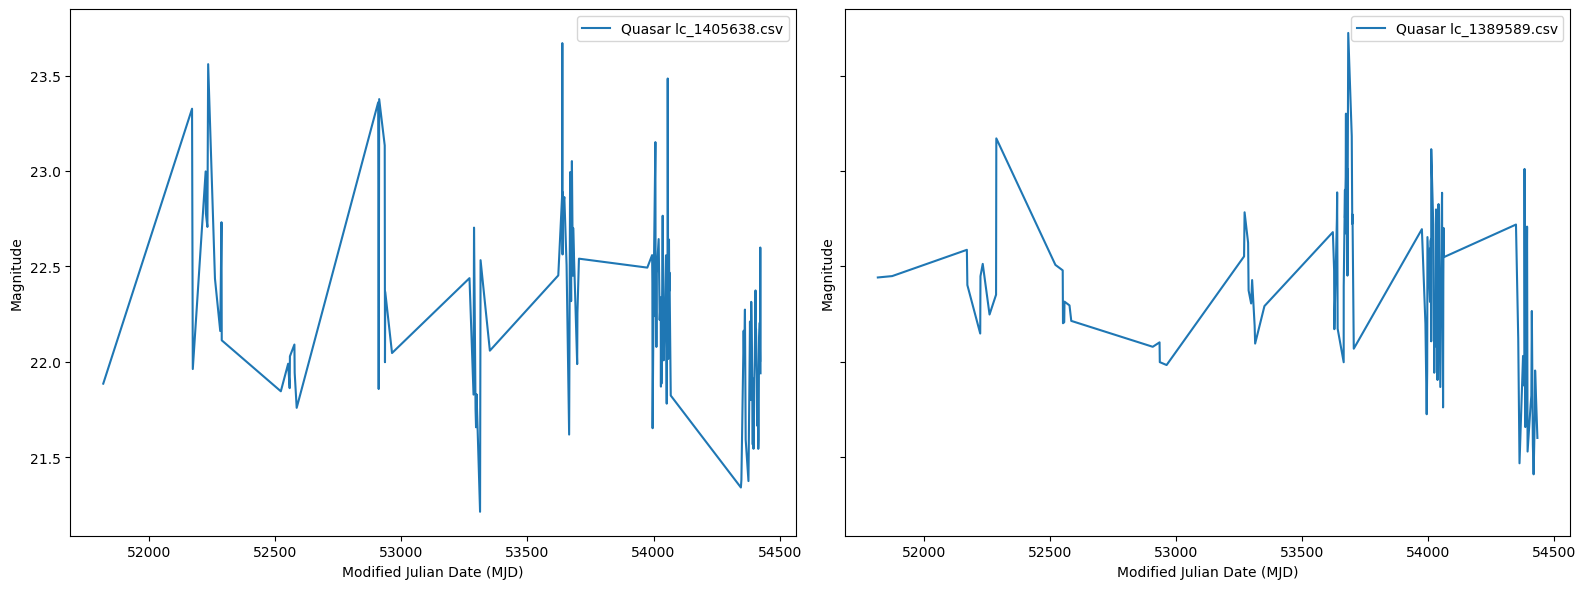

Similar curves are: lc_1405638.csv and lc_1389779.csv.



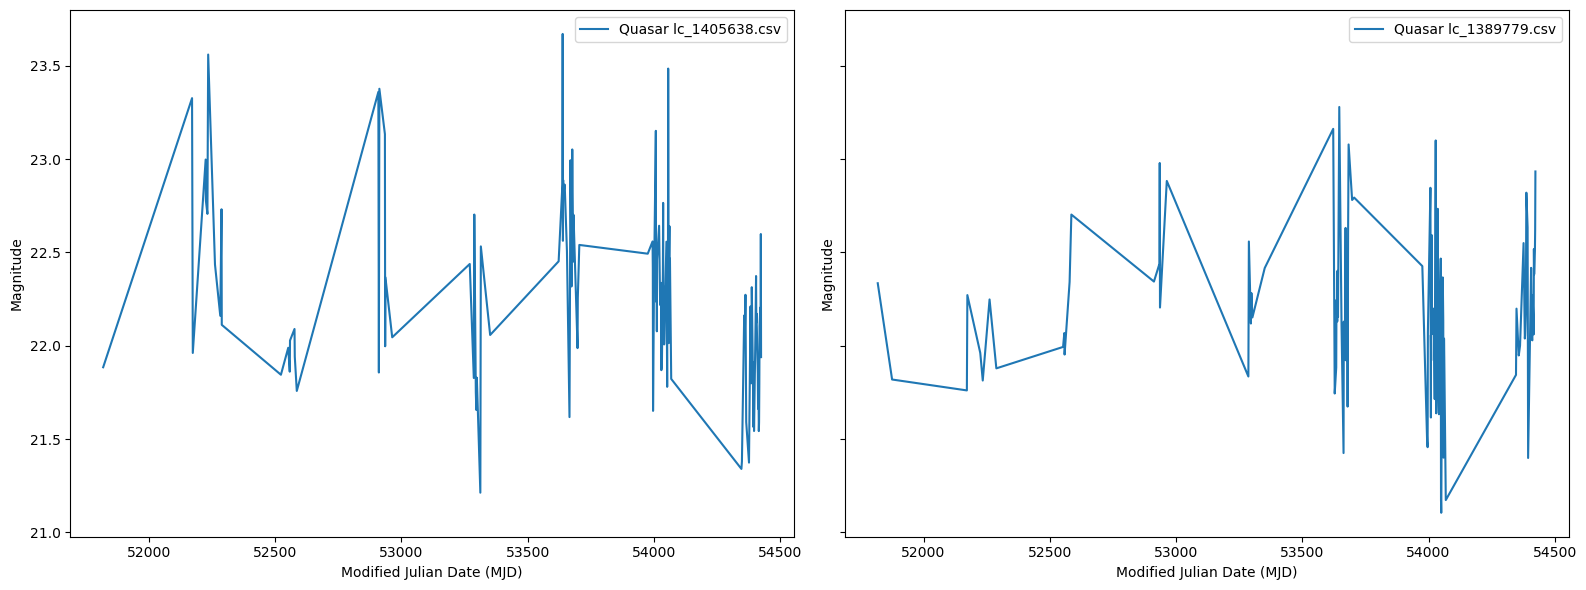

Similar curves are: lc_1408848.csv and lc_1388041.csv.



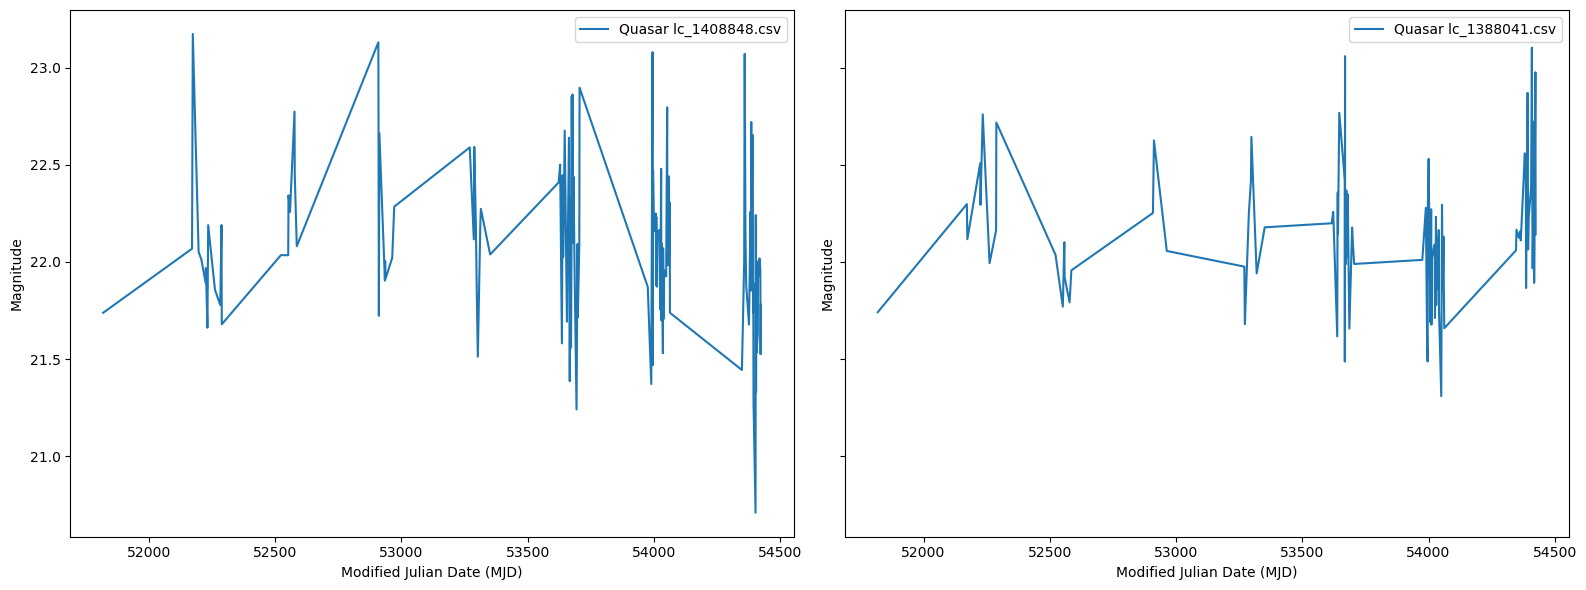

Similar curves are: lc_1408848.csv and lc_1389779.csv.



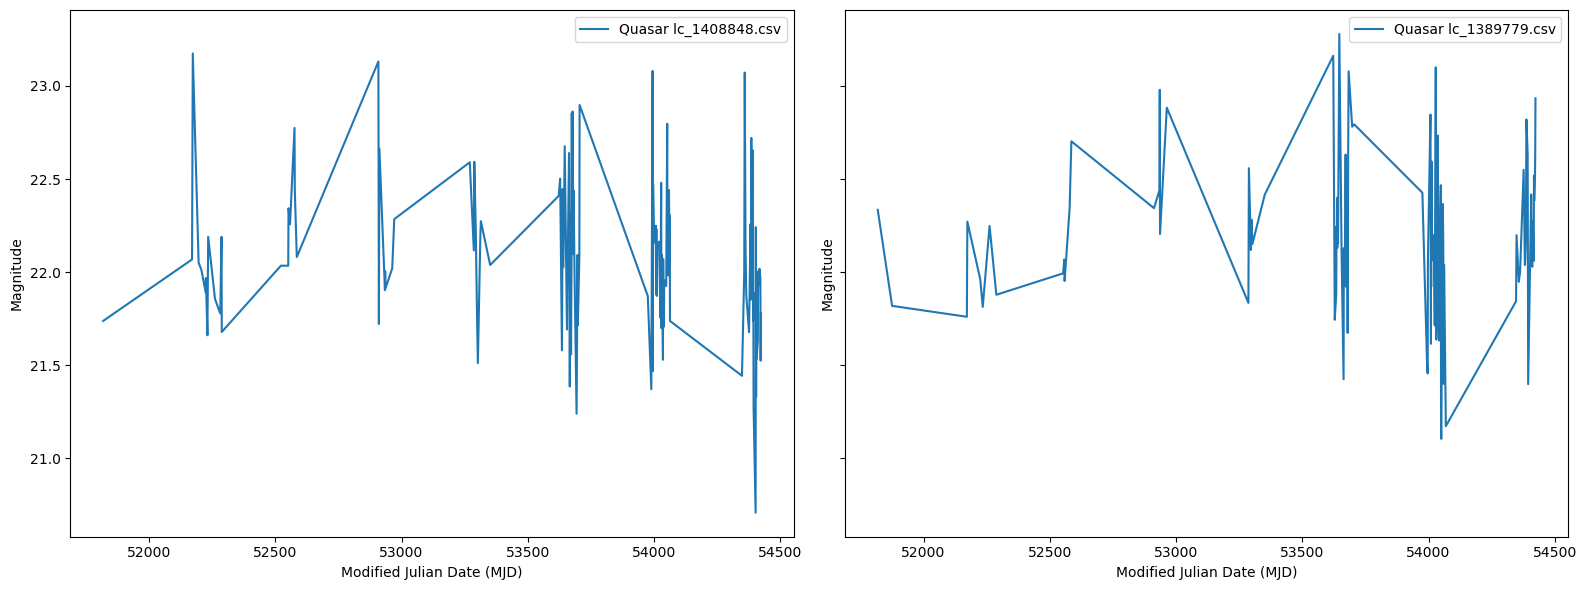

Similar curves are: lc_1409795.csv and lc_1384375.csv.



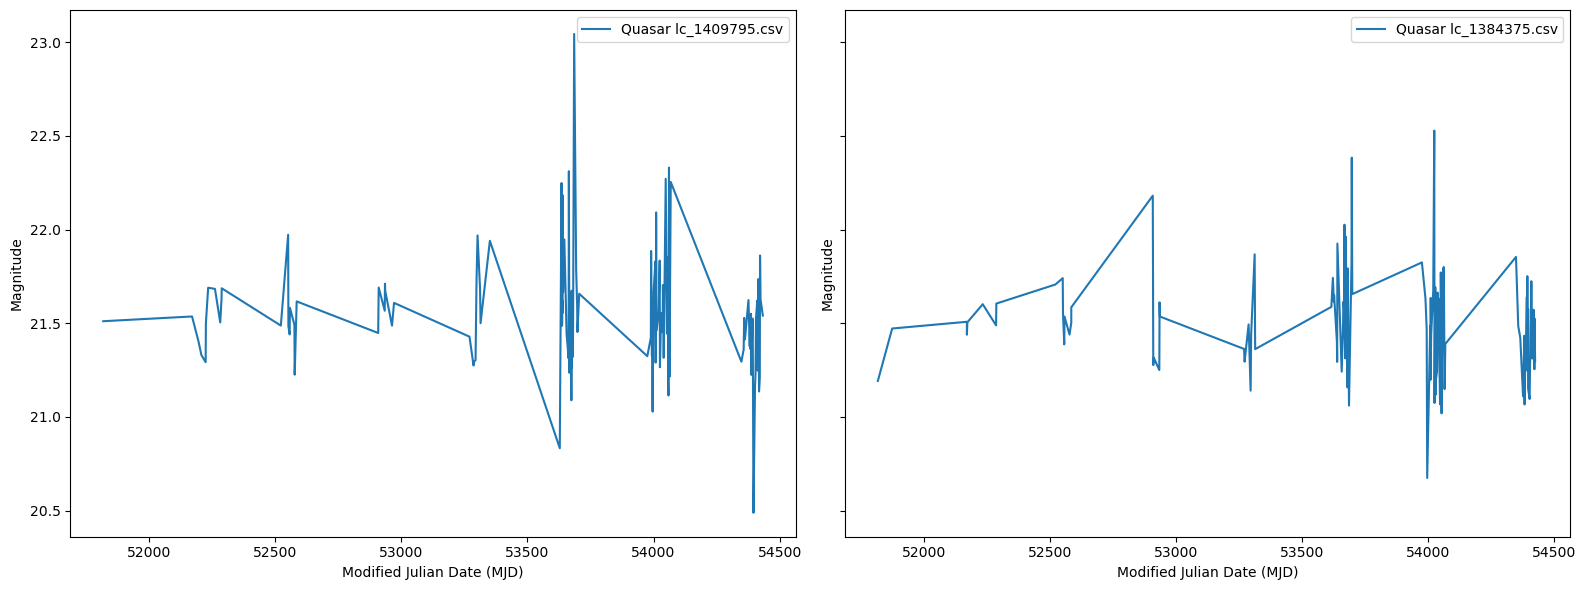

In [8]:
from scipy.stats import ttest_ind

# Assuming 'mag' is the column containing magnitude data
for curve_name1, data1 in dataframes.items():
    for curve_name2, data2 in dataframes.items():
        if curve_name1 != curve_name2:  # Avoid comparing the same light curve
            # Perform t-test to check similarity
            result = ttest_ind(data1['mag'], data2['mag'])
            p_value = result.pvalue
            if p_value >= 0.05:
                # Plot similar curves side by side
                print(f"Similar curves are: {curve_name1} and {curve_name2}.\n")
                fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
                
                # Plot data1
                axes[0].plot(data1['mjd'], data1['mag'], label=f'Quasar {curve_name1}')
                axes[0].set_xlabel('Modified Julian Date (MJD)')
                axes[0].set_ylabel('Magnitude')
                axes[0].legend()

                # Plot data2
                axes[1].plot(data2['mjd'], data2['mag'], label=f'Quasar {curve_name2}')
                axes[1].set_xlabel('Modified Julian Date (MJD)')
                axes[1].set_ylabel('Magnitude')
                axes[1].legend()

                # Adjust layout to prevent overlapping
                plt.tight_layout()

                plt.show()


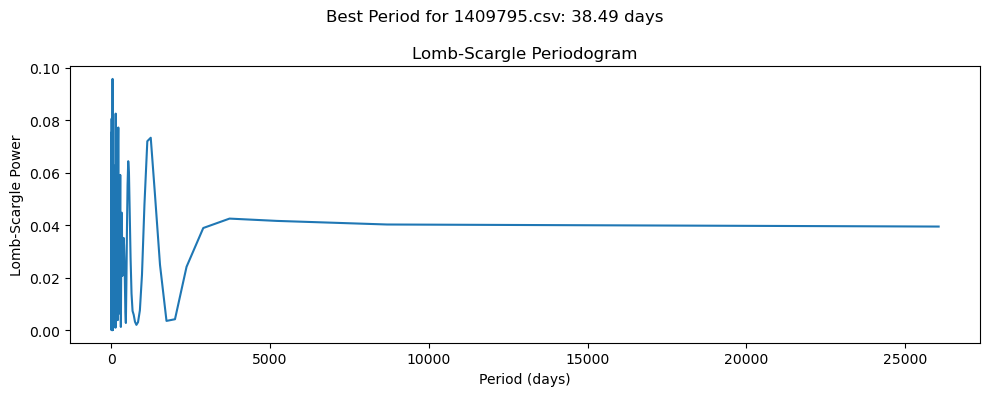

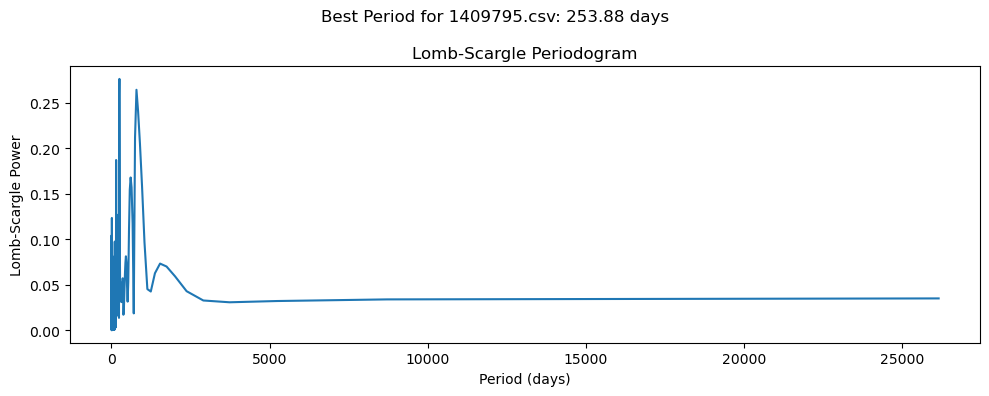

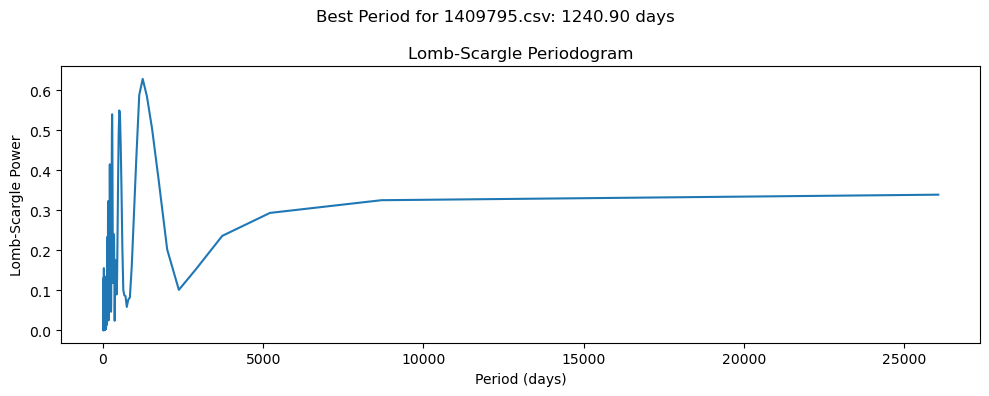

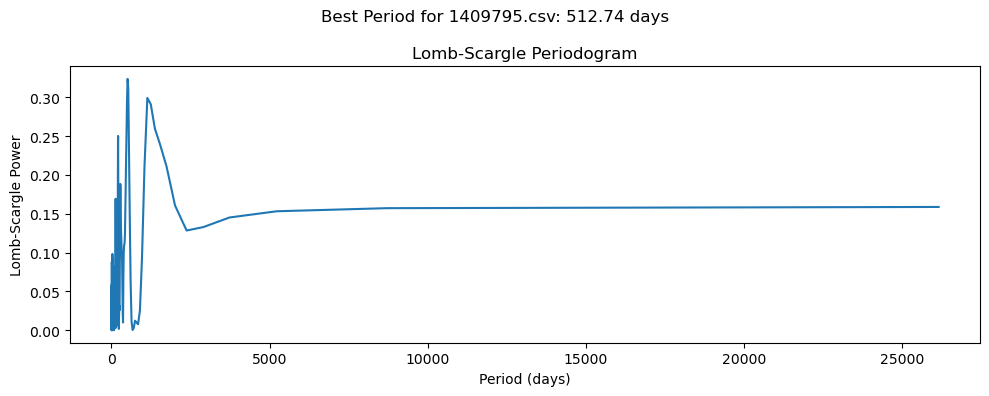

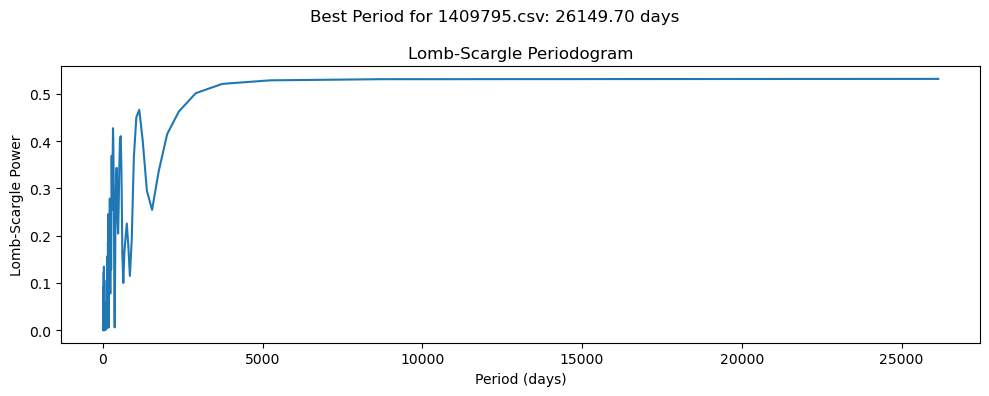

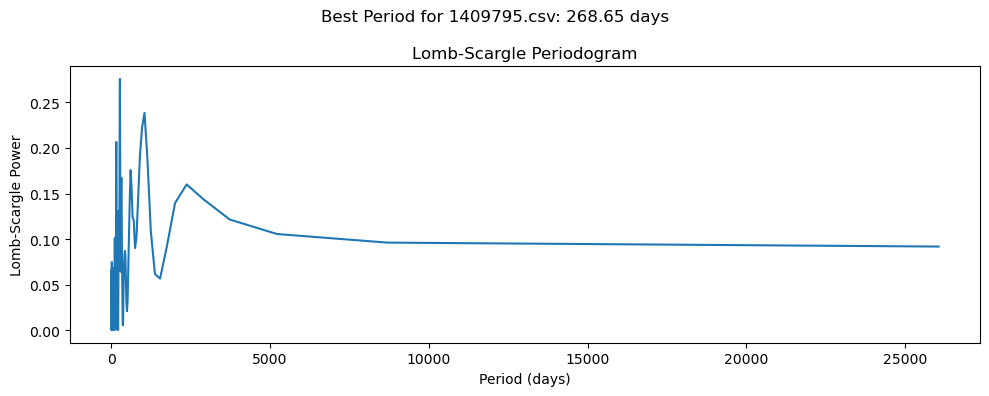

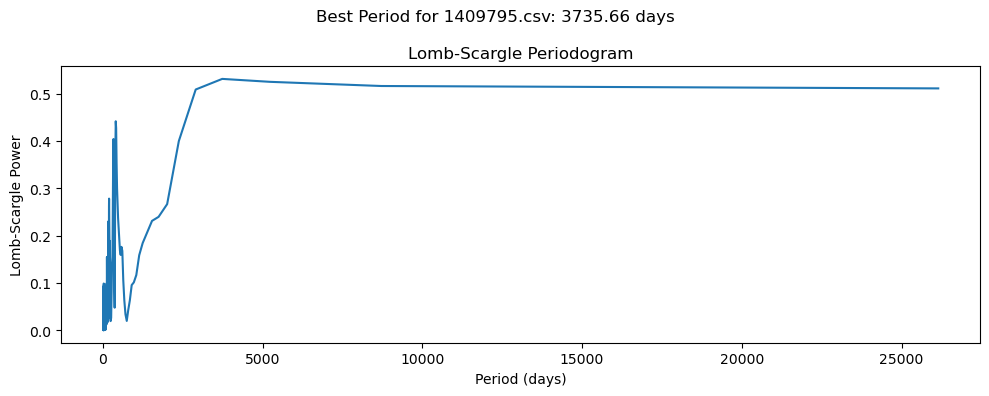

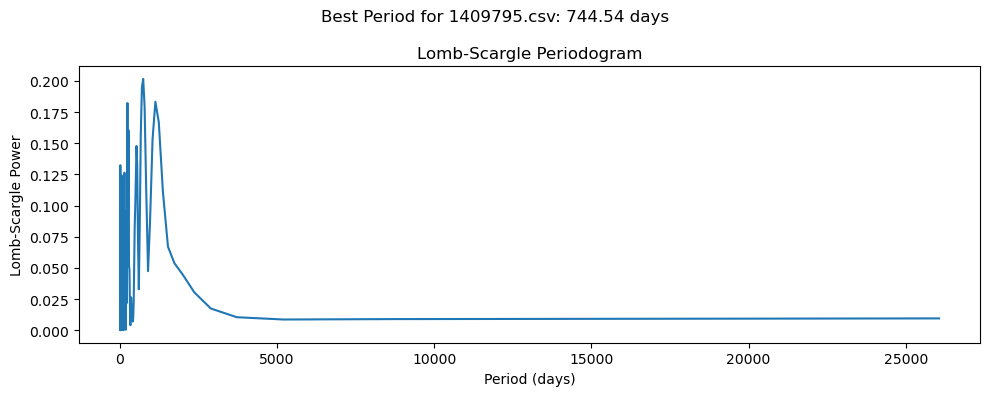

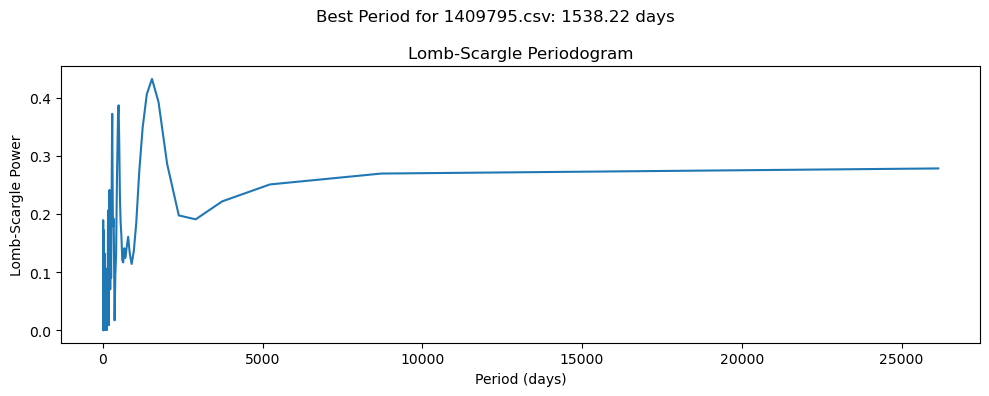

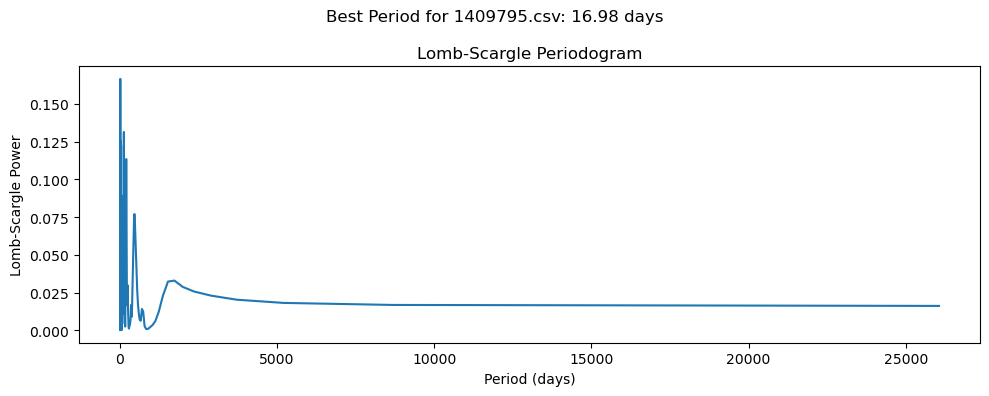

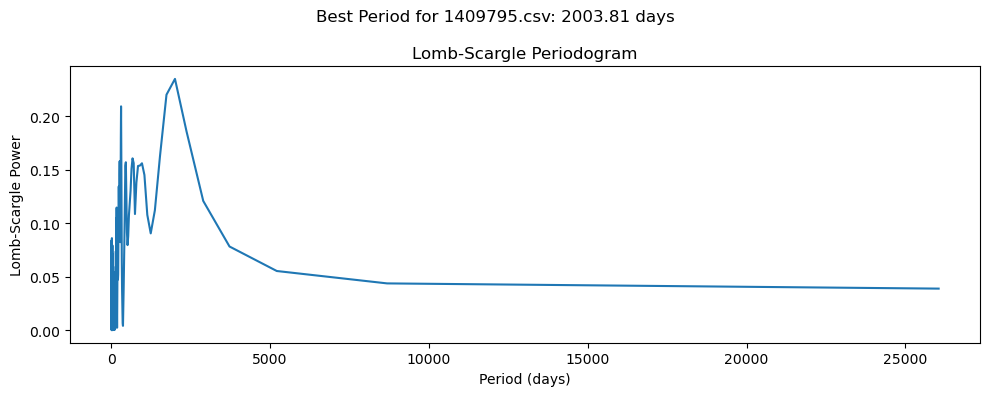

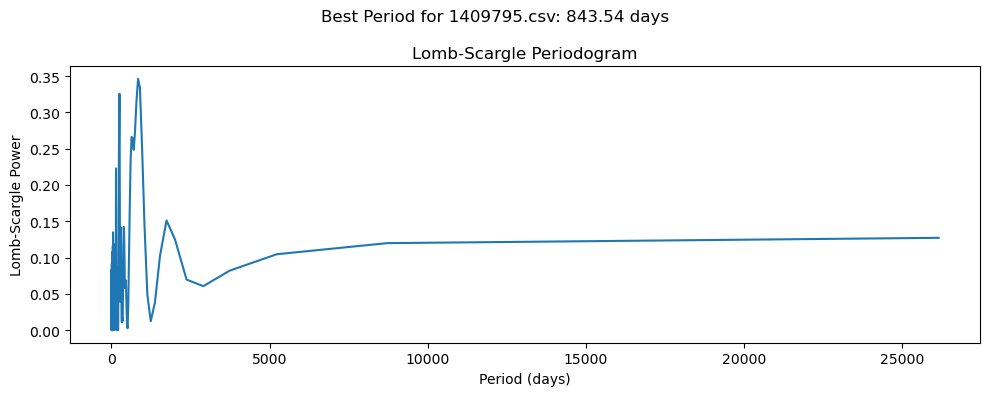

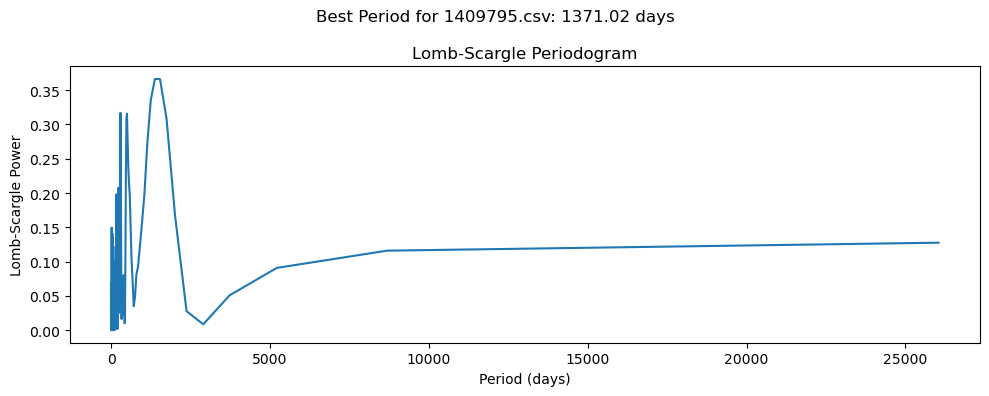

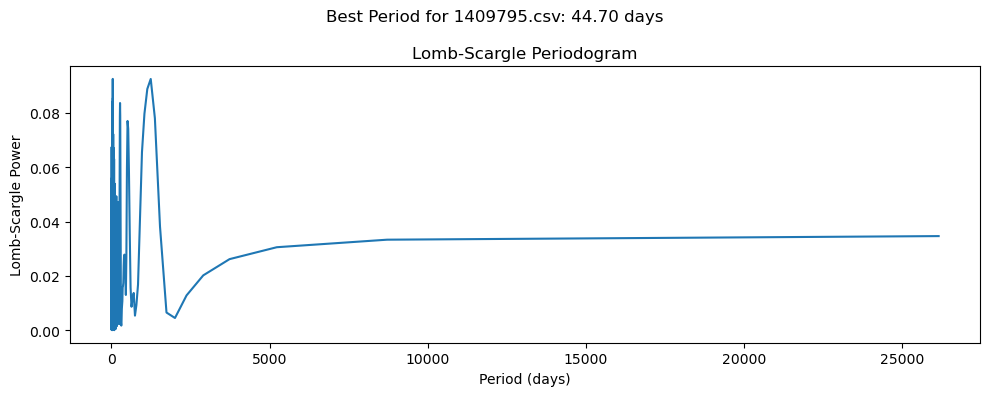

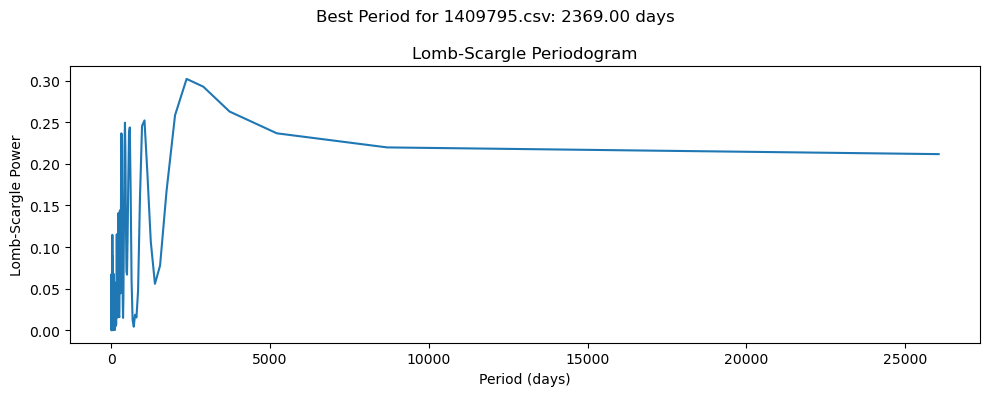

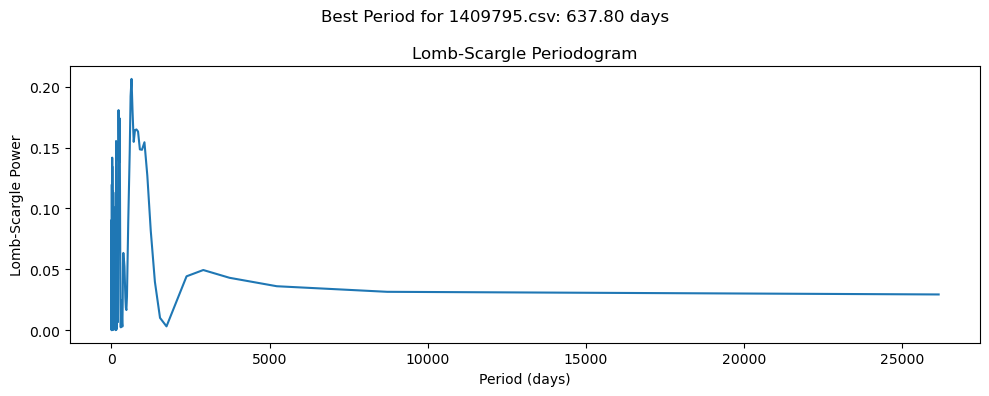

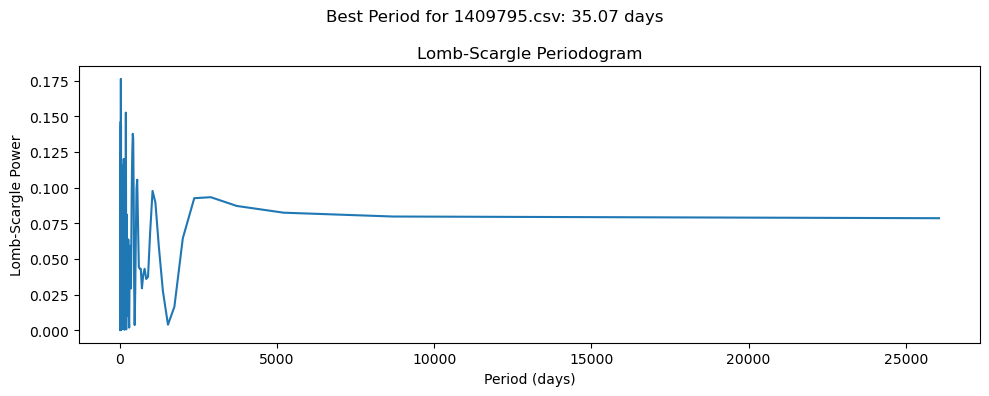

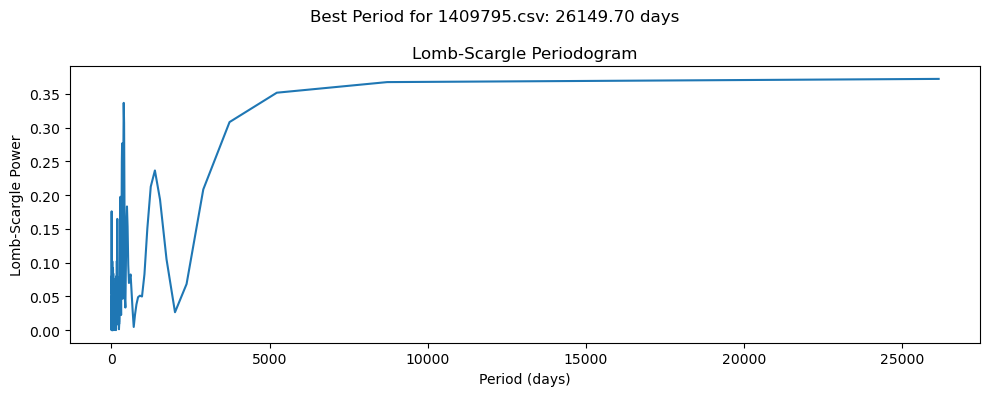

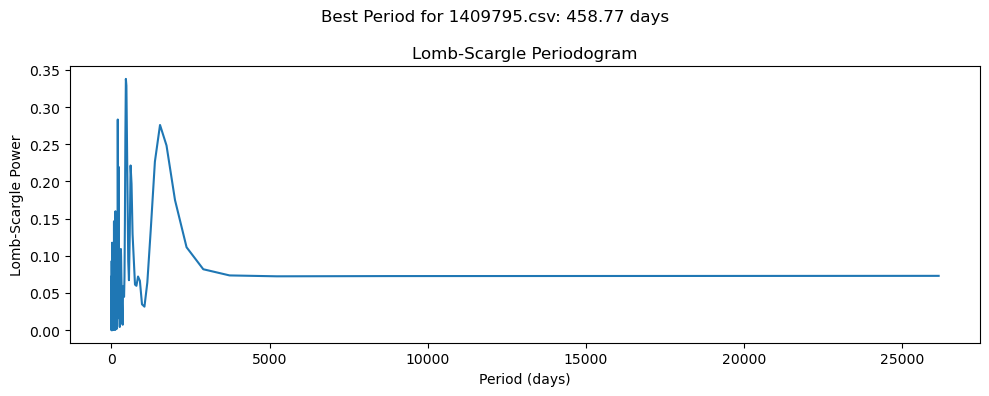

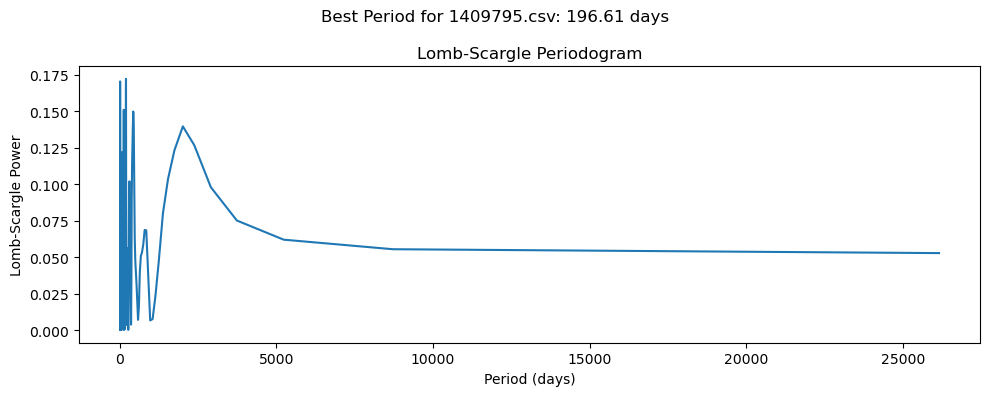

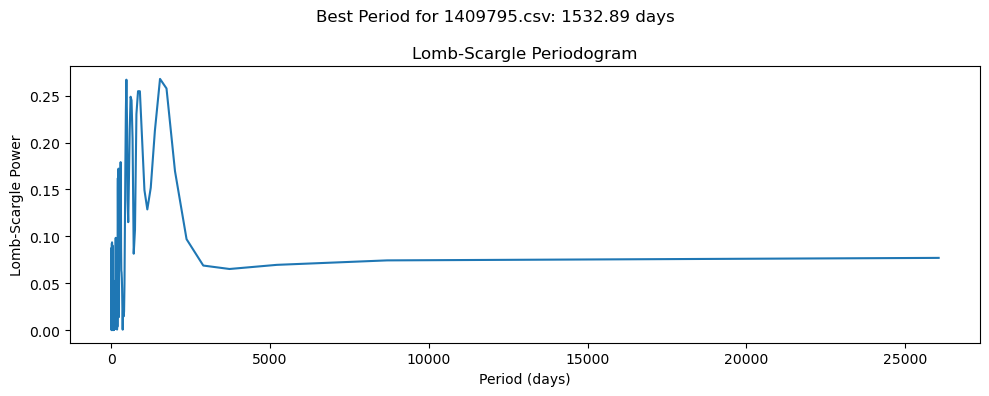

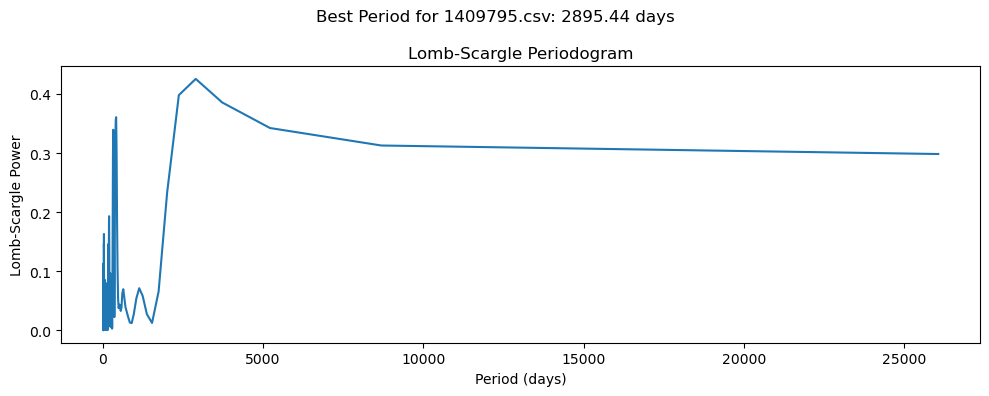

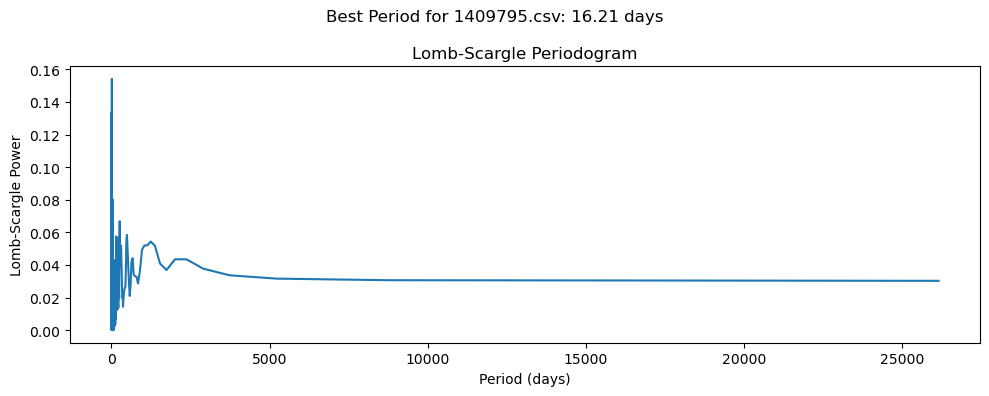

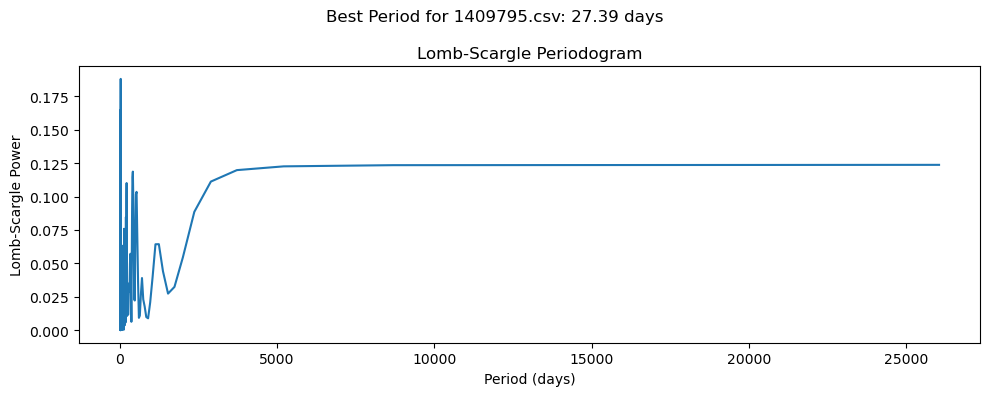

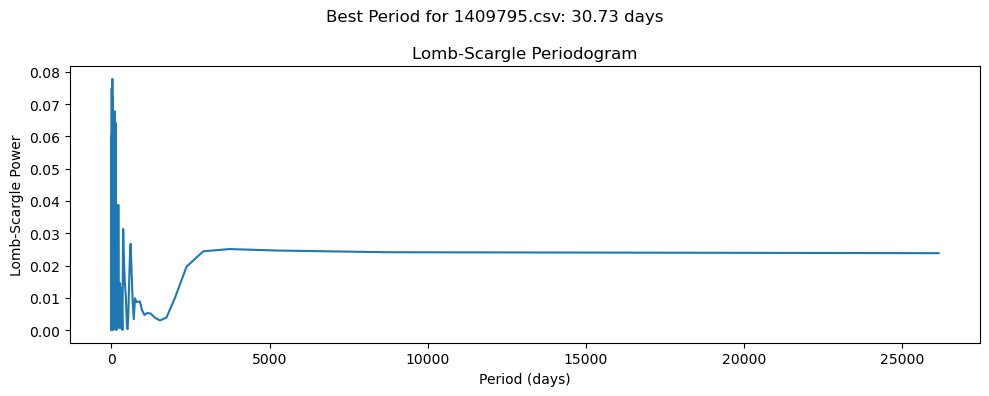

In [9]:
best_periods = []
for key, df in dataframes.items(): 
        
    # Extract columns
    mjd = df['mjd']
    magnitude = df['mag']
    magnitude_error = df['magerr']

    # Lomb-Scargle periodogram analysis
    frequency, power = LombScargle(mjd, magnitude, dy=magnitude_error).autopower()

    # Find the best period (corresponding to the highest power)
    best_period = 1 / frequency[np.argmax(power)]
    
    # Plot the periodogram
    plt.figure(figsize=(10, 4))
    plt.plot(1 / frequency, power)
    plt.xlabel('Period (days)')
    plt.ylabel('Lomb-Scargle Power')
    plt.title('Lomb-Scargle Periodogram')

    # Display the best period
    plt.suptitle(f'Best Period for {file_name}: {best_period:.2f} days')
    plt.tight_layout()
    plt.show()

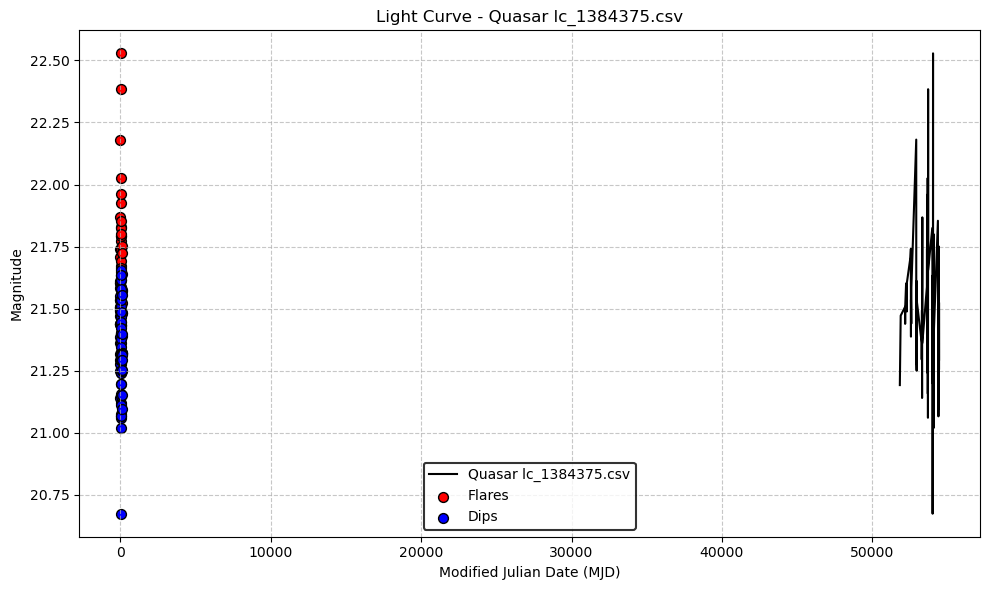

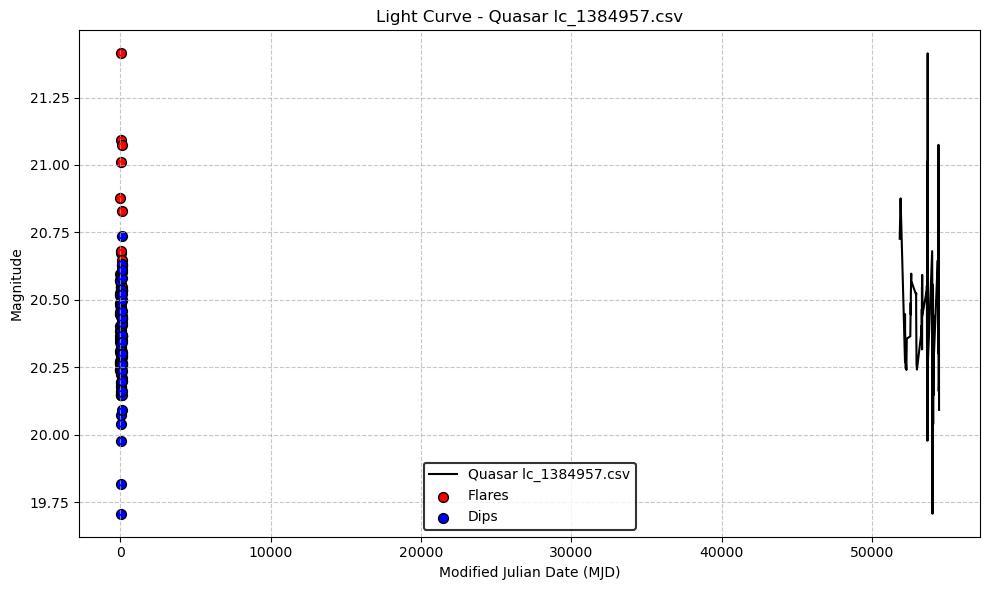

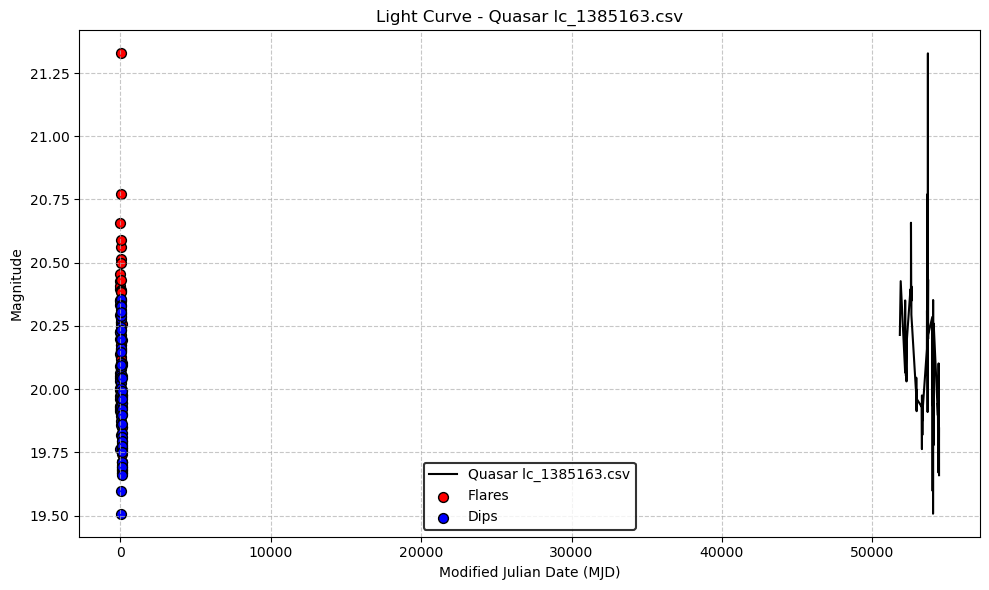

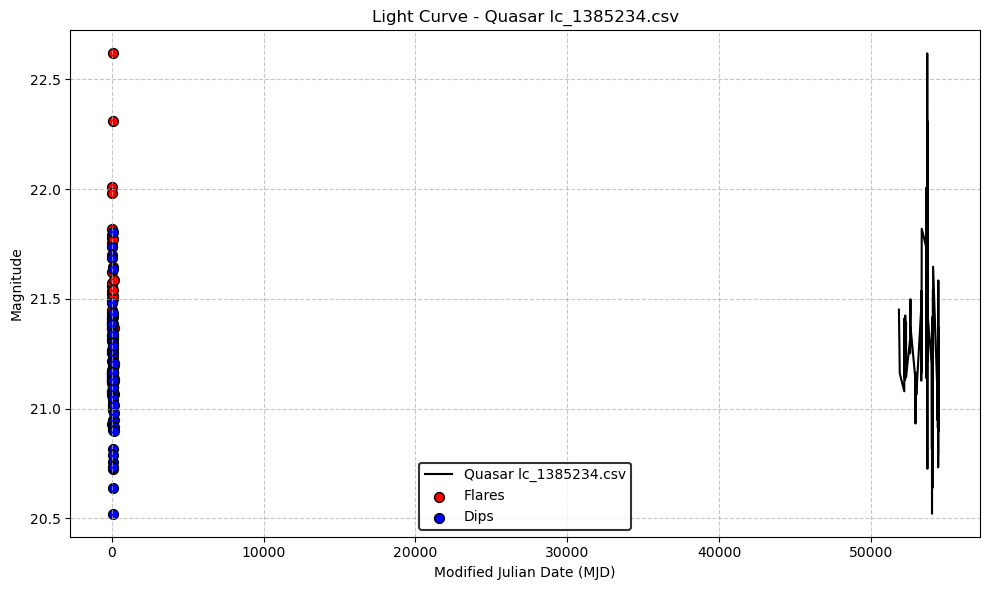

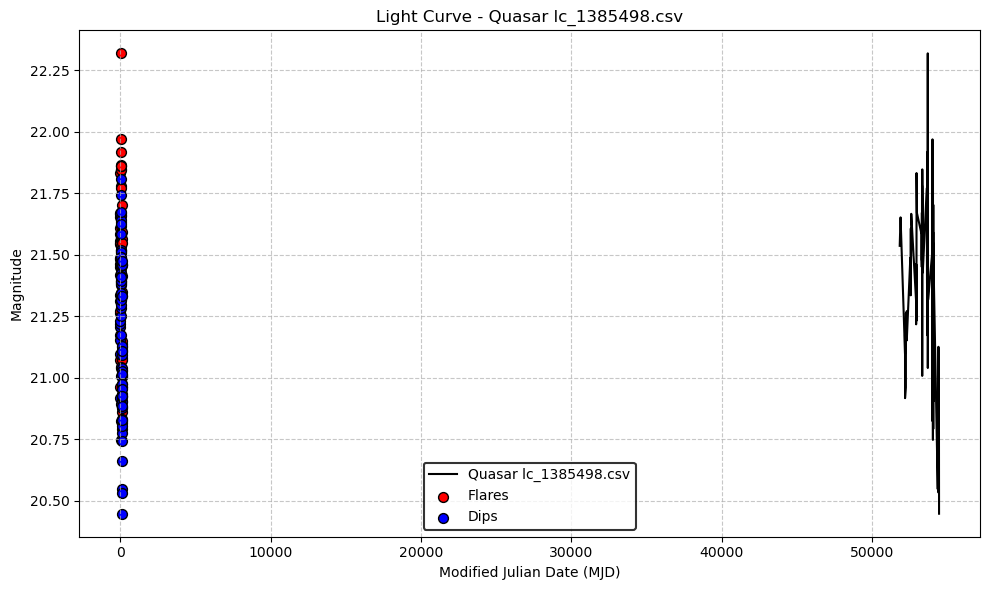

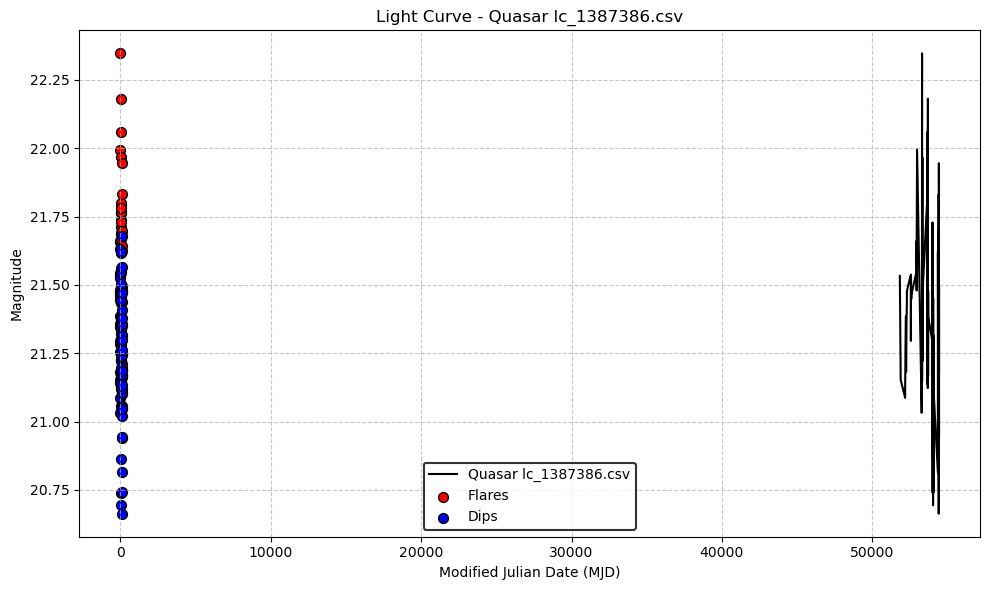

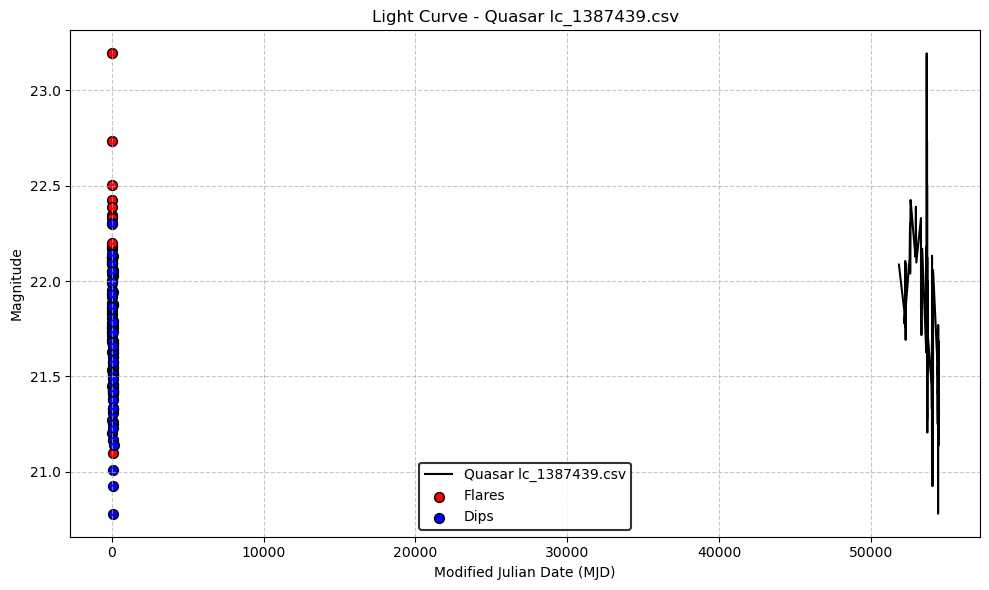

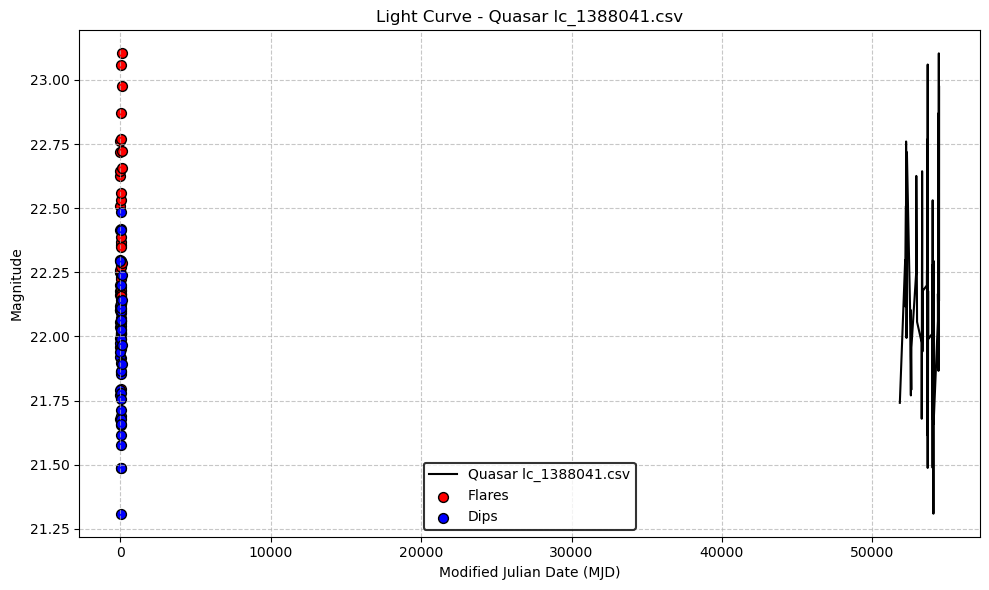

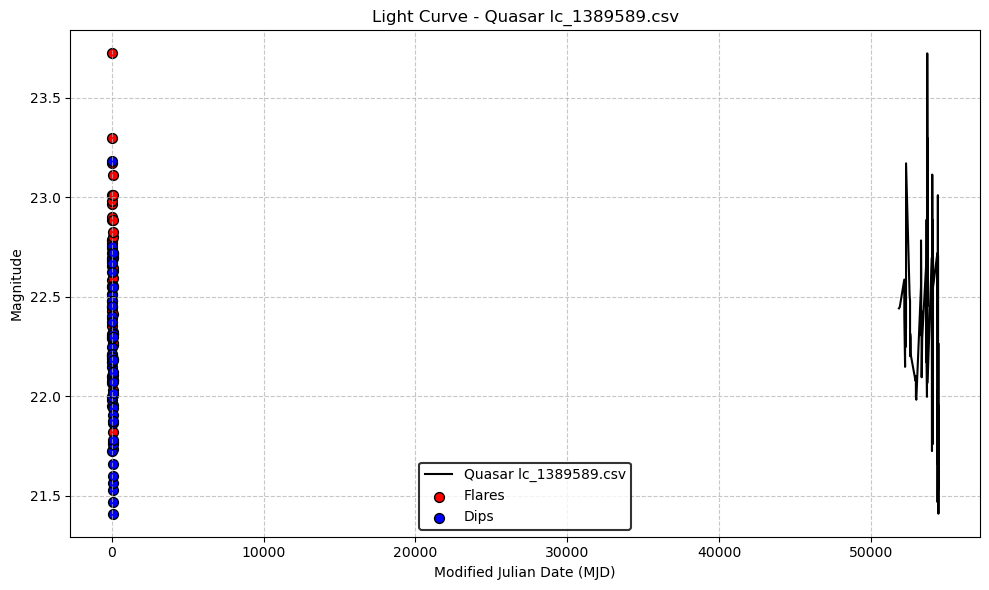

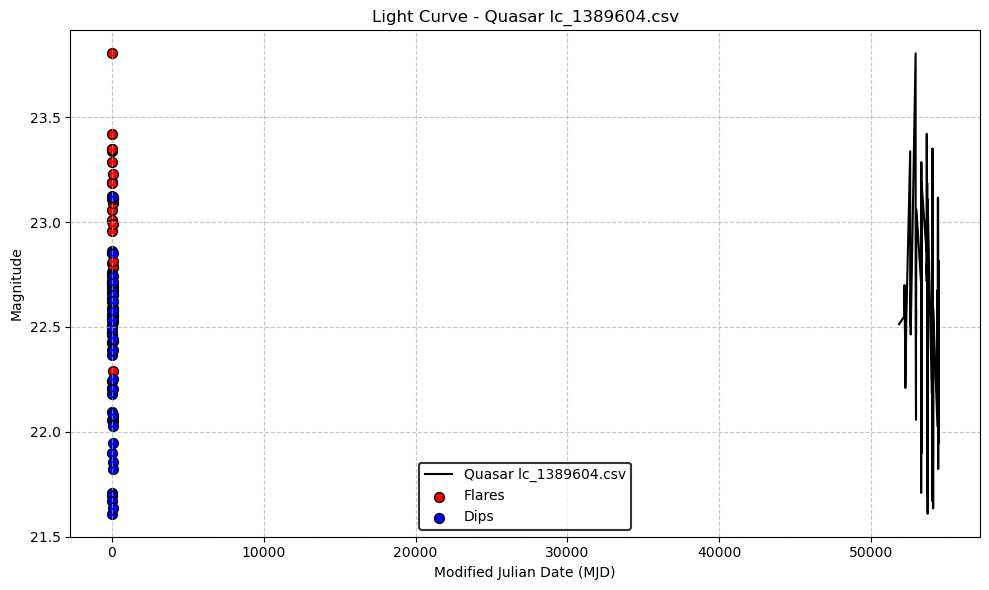

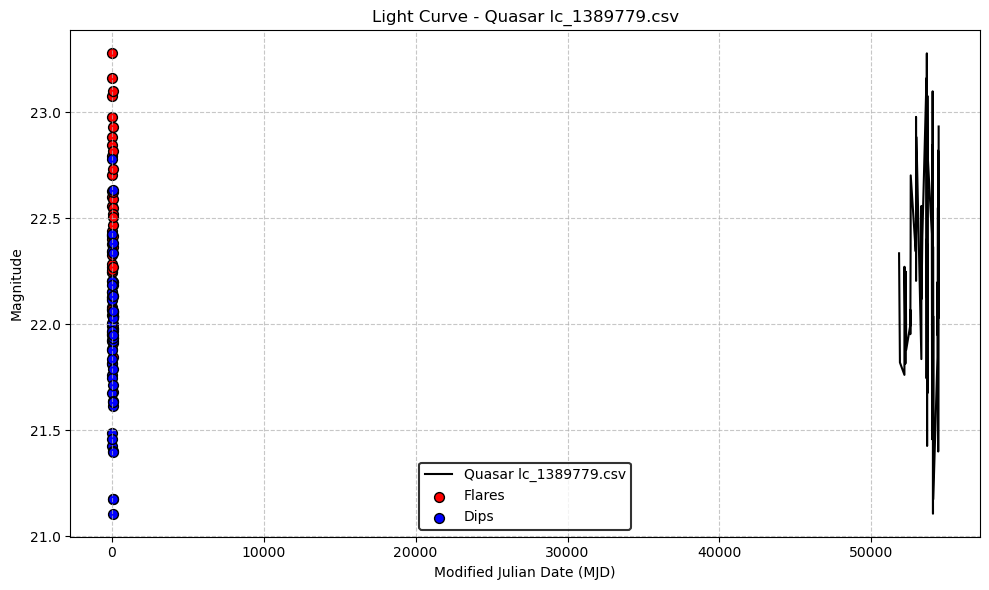

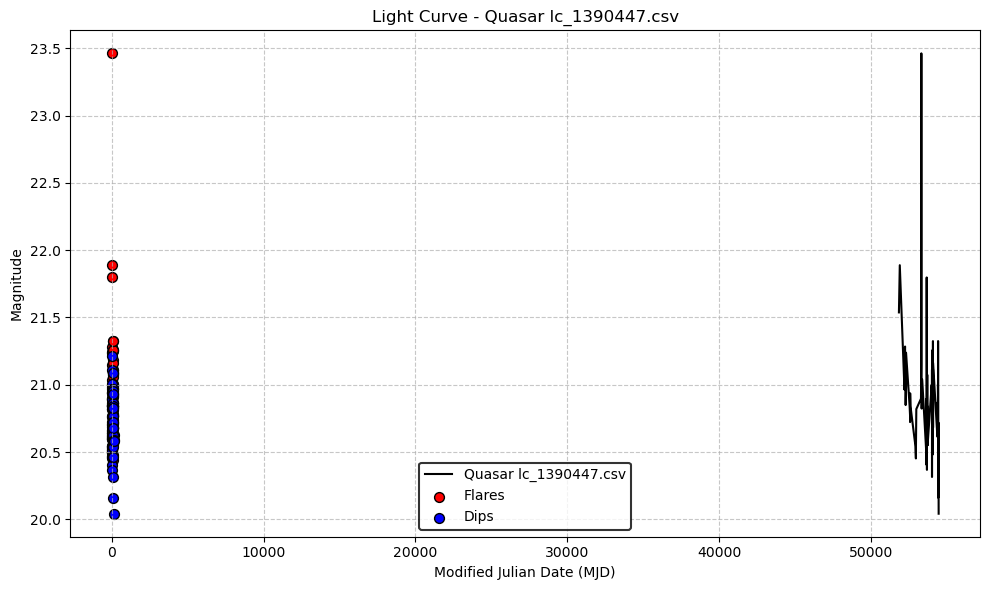

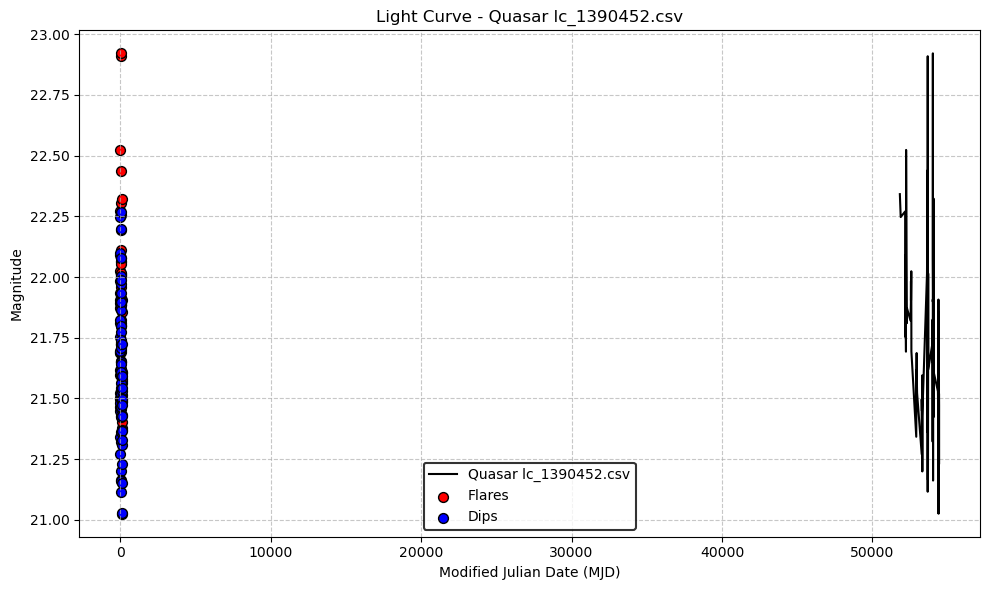

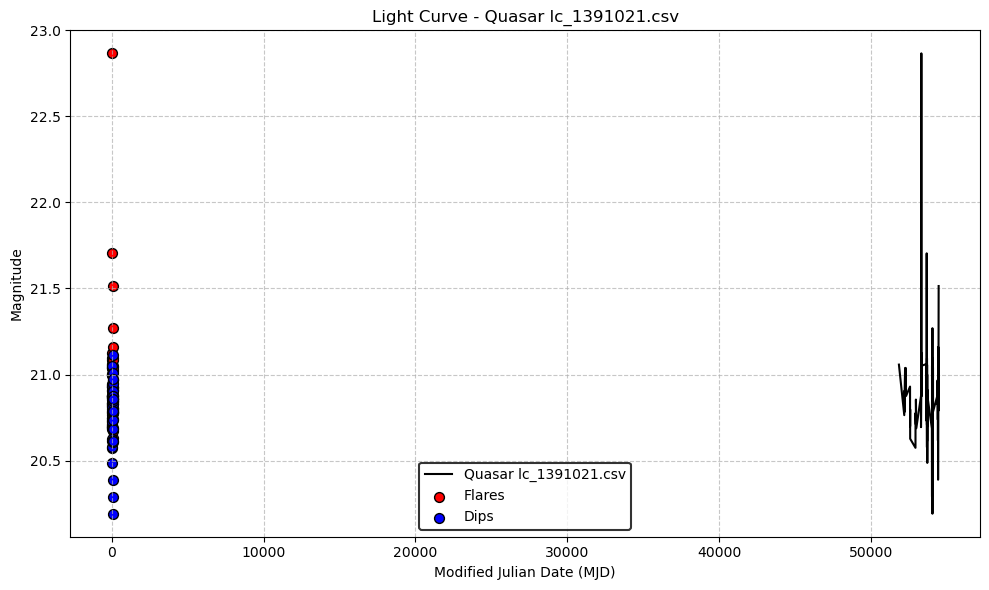

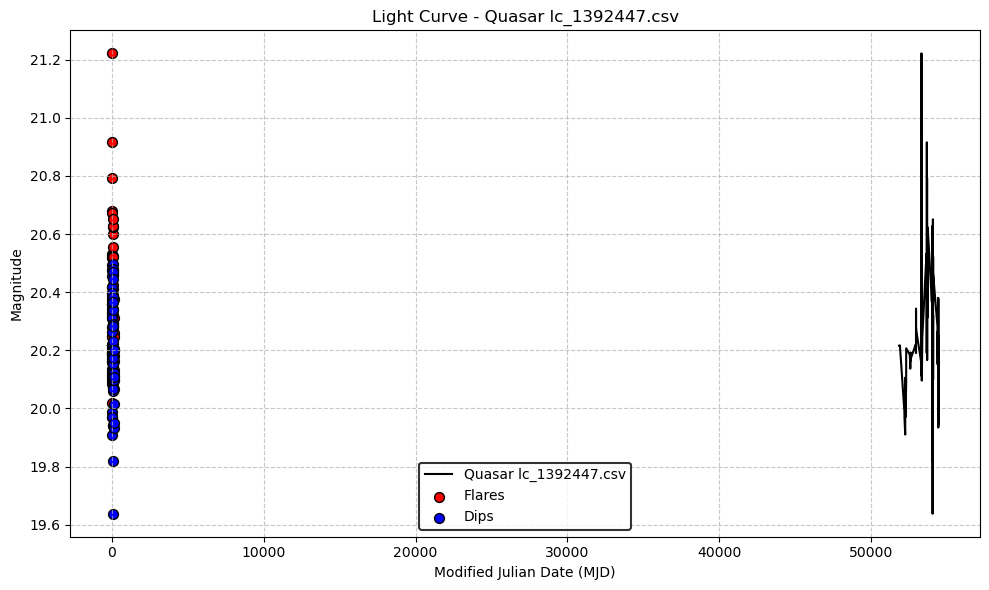

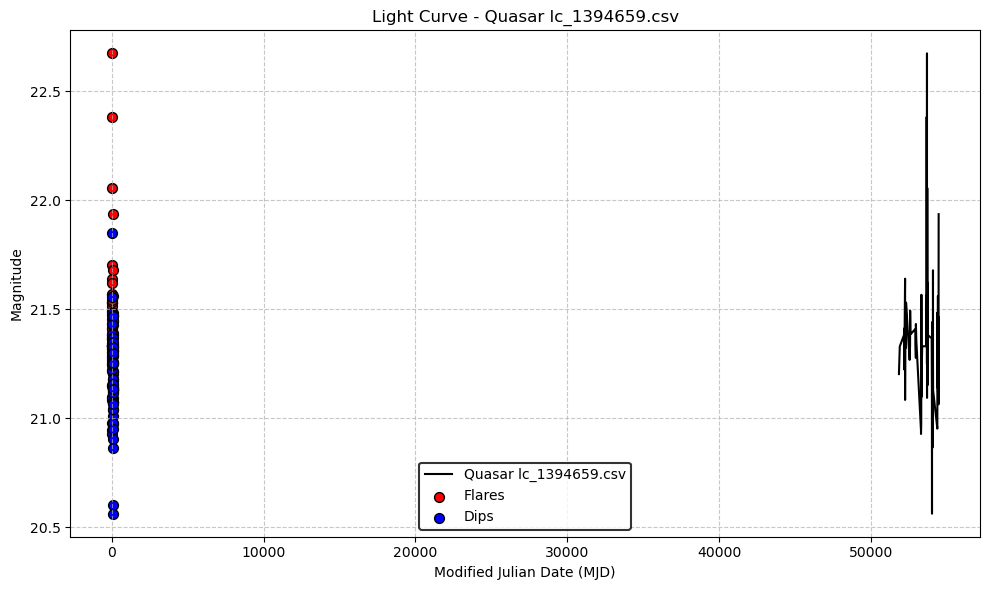

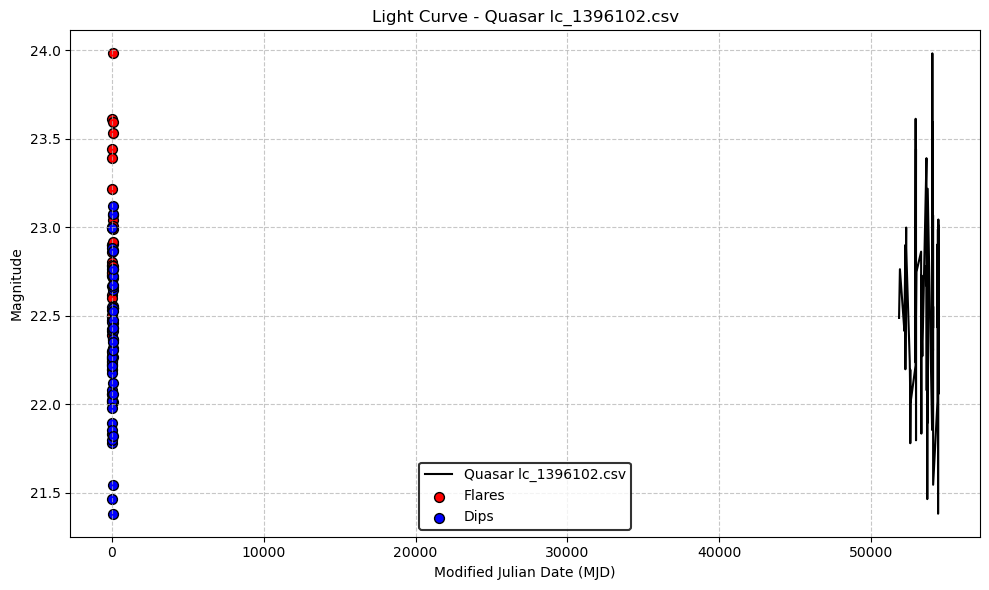

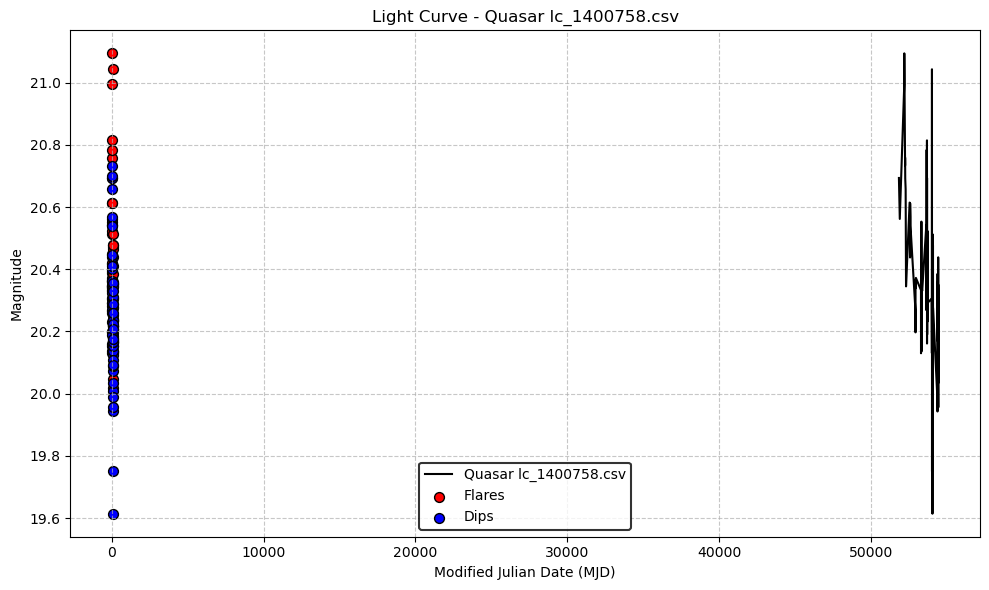

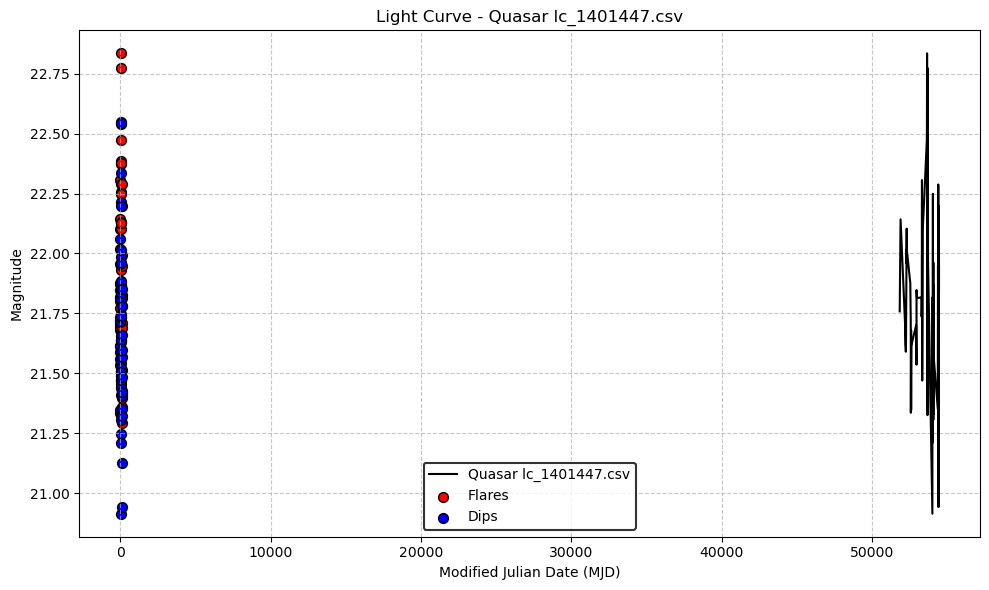

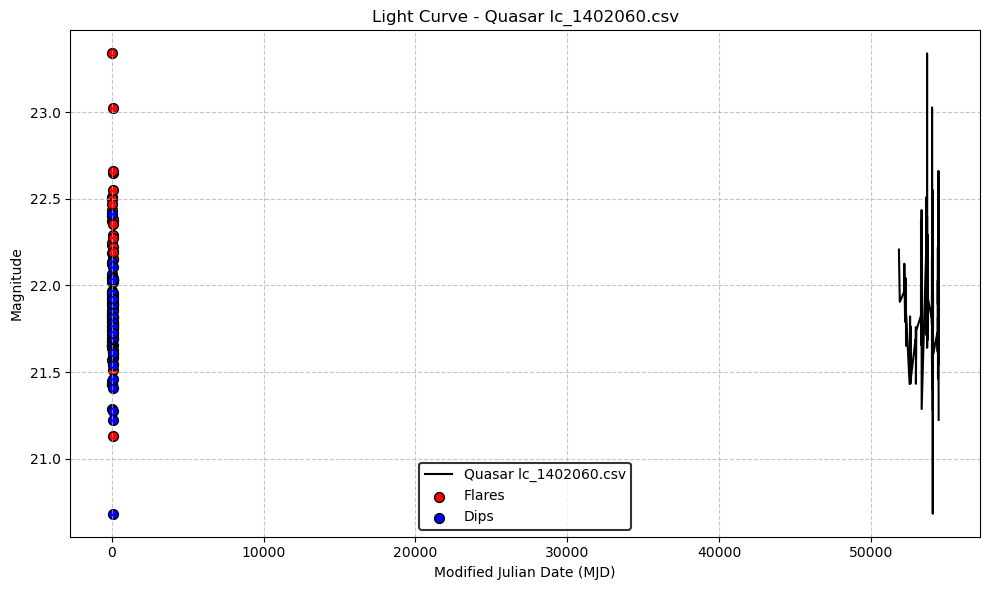

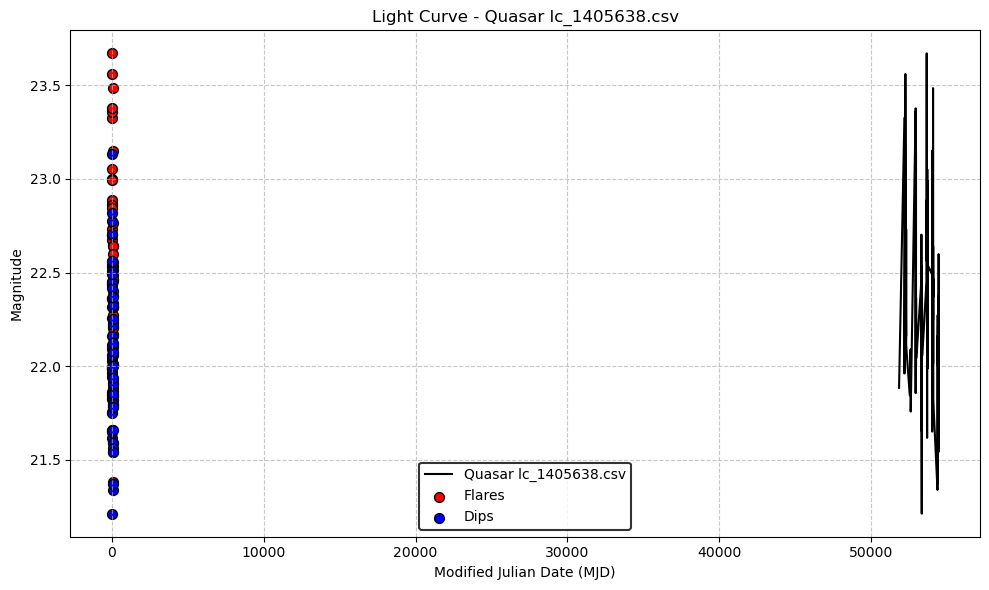

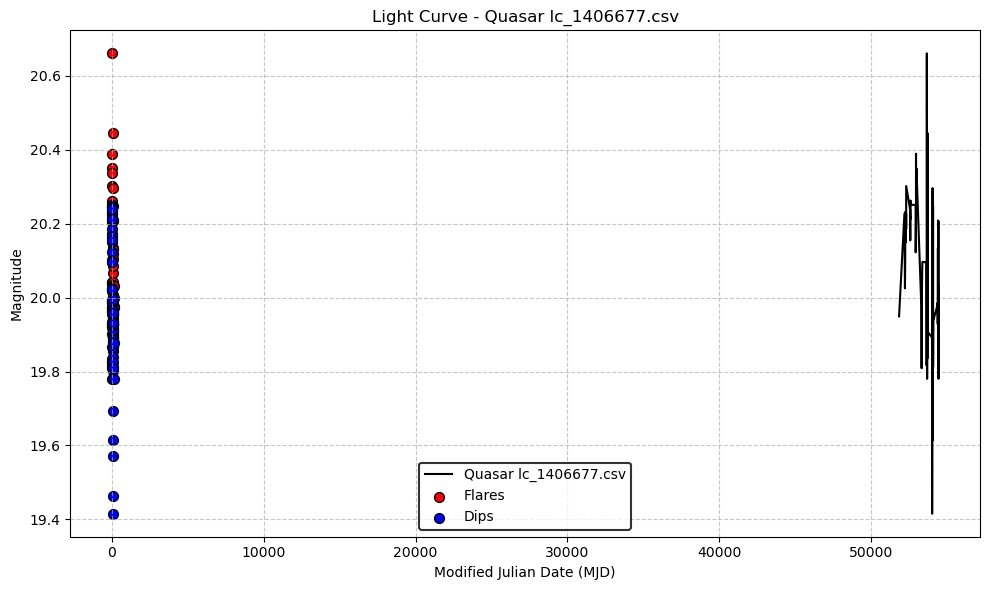

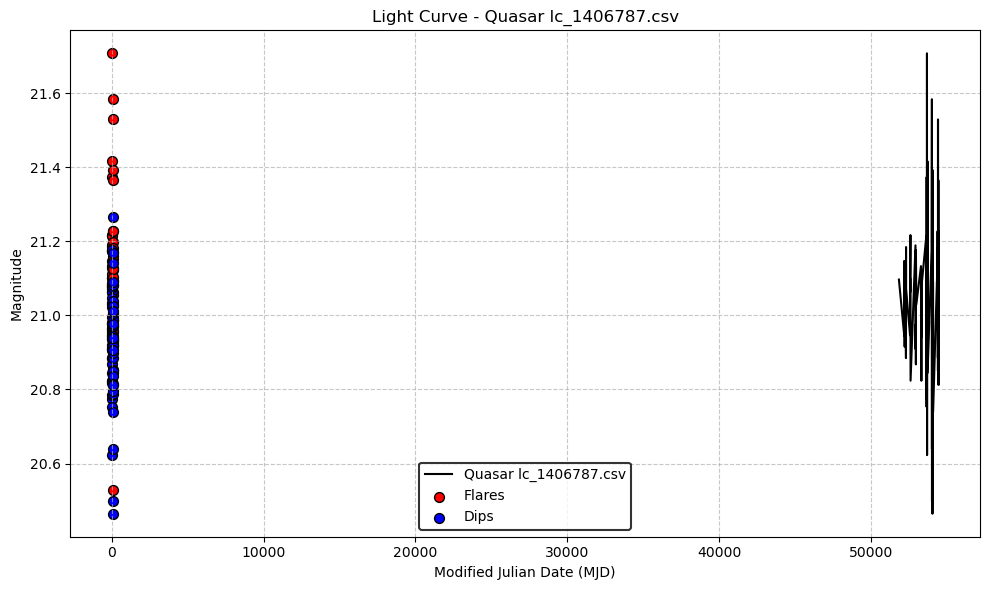

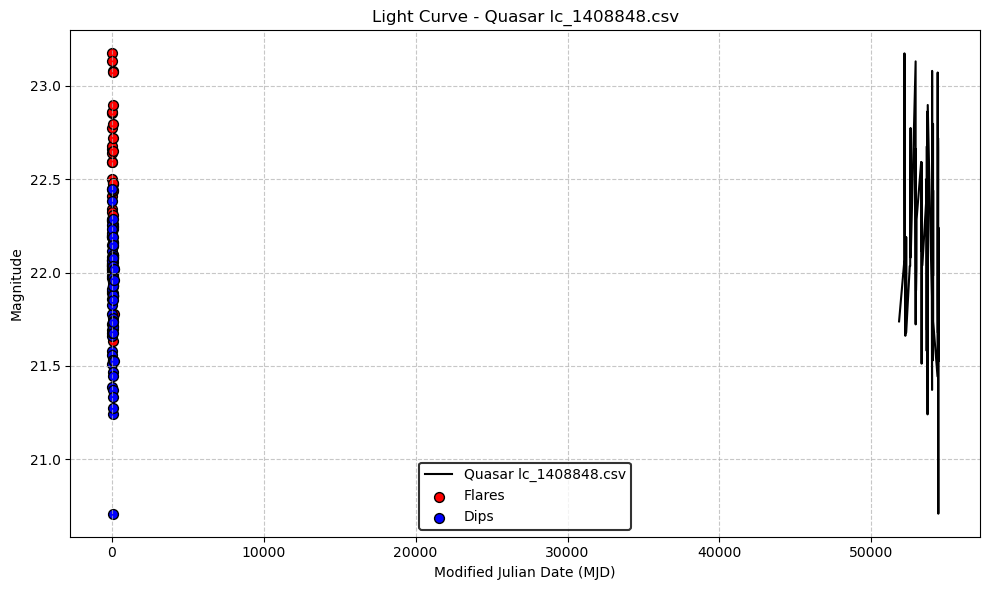

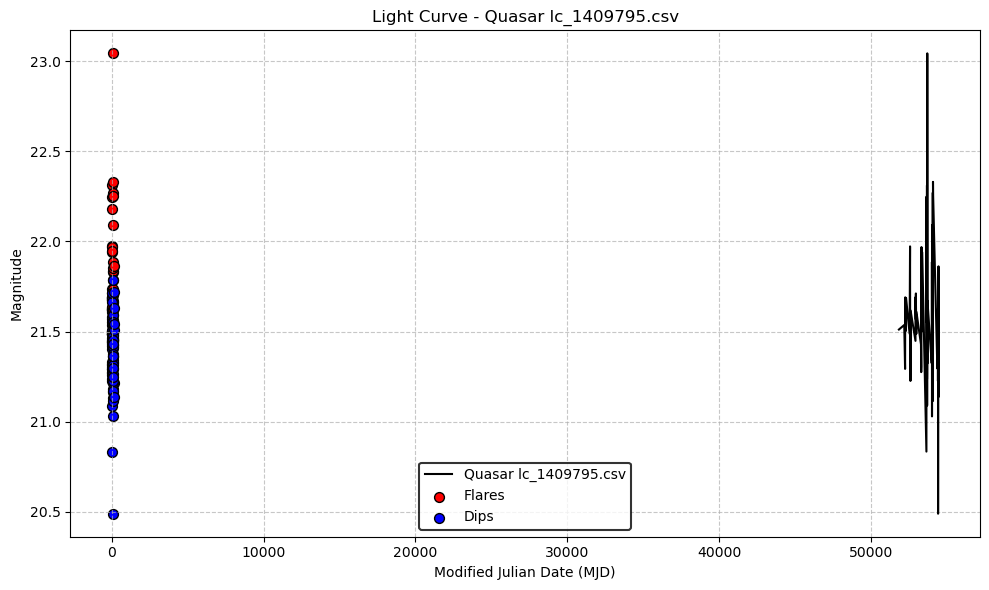

In [10]:
for curve_name, data in dataframes.items():
    # Identify peaks (flares) and valleys (dips)
    peaks = data['mag'].loc[data['mag'].diff() > 0]
    valleys = data['mag'].loc[data['mag'].diff() < 0]

    # Plot the light curve with identified flares and dips
    plt.figure(figsize=(10, 6))
    plt.plot(data['mjd'], data['mag'], label=f'Quasar {curve_name}', color='black', linewidth=1.5)
    plt.scatter(peaks.index, peaks, c='red', marker='o', s=50, label='Flares', edgecolors='black')
    plt.scatter(valleys.index, valleys, c='blue', marker='o', s=50, label='Dips', edgecolors='black')

    # Enhancements for better readability
    plt.xlabel('Modified Julian Date (MJD)')
    plt.ylabel('Magnitude')
    plt.title(f'Light Curve - Quasar {curve_name}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Customize the appearance of the legend
    legend = plt.legend()
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1.5)

    plt.tight_layout()
    plt.show()


# QNPy implementation

In [11]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [12]:

#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 
# In this example we used pandas python package for importing the .csv data, but numpy can be used if the data is 
#in .txt file
path = './light_curves' #path to data
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)
data

mjd        mag    magerr
0     51818.42  21.192532  0.125457
1     51875.25  21.472197  0.122197
2     52171.41  21.508141  0.139710
3     52171.48  21.439072  0.131582
4     52173.39  21.505394  0.175264
...        ...        ...       ...
3111  54421.31  21.211800  0.184235
3112  54422.31  21.861906  0.293930
3113  54423.29  21.718678  0.316641
3114  54424.25  21.628750  0.346117
3115  54433.31  21.541115  0.490133

[3116 rows x 3 columns]

In [13]:
#Statistics of the whole dataset
data.describe()

mjd          mag       magerr
count   3116.000000  3116.000000  3116.000000
mean   53689.297413    21.358071     0.216586
std      669.171643     0.825646     0.165788
min    51818.340000    19.415165     0.035779
25%    53319.320000    20.762888     0.095944
50%    53989.430000    21.413465     0.170052
75%    54061.332500    21.949061     0.283177
max    54433.370000    23.983812     0.988308

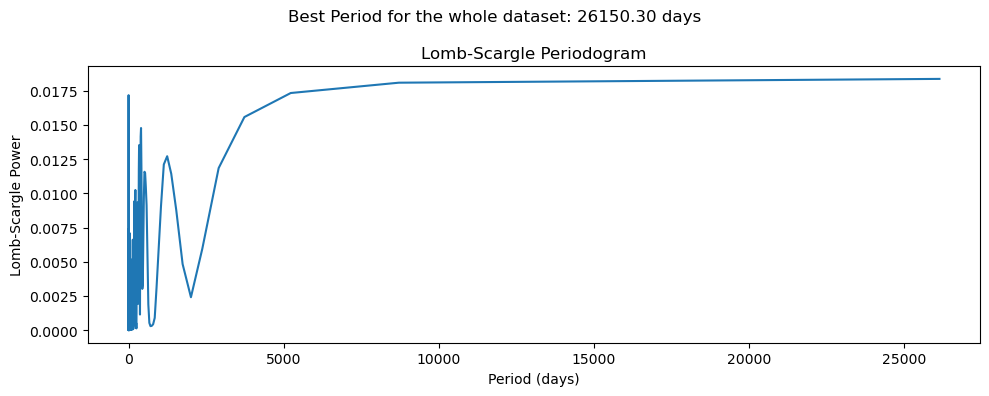

In [29]:
    mjd = data['mjd']
    magnitude = data['mag']
    magnitude_error = data['magerr']

    # Lomb-Scargle periodogram analysis
    frequency, power = LombScargle(mjd, magnitude, dy=magnitude_error).autopower()

    # Find the best period (corresponding to the highest power)
    best_period = 1 / frequency[np.argmax(power)]
    
    # Plot the periodogram
    plt.figure(figsize=(10, 4))
    plt.plot(1 / frequency, power)
    plt.xlabel('Period (days)')
    plt.ylabel('Lomb-Scargle Power')
    plt.title('Lomb-Scargle Periodogram')

    # Display the best period
    plt.suptitle(f'Best Period for the whole dataset: {best_period:.2f} days')
    plt.tight_layout()
    plt.show()

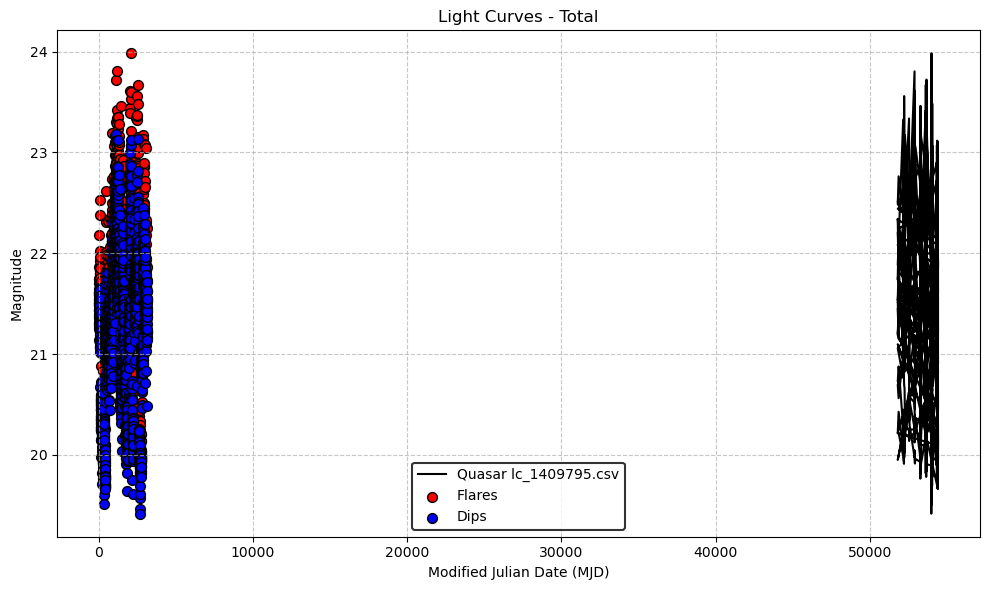

In [31]:
    # Identify peaks (flares) and valleys (dips)
    peaks = data['mag'].loc[data['mag'].diff() > 0]
    valleys = data['mag'].loc[data['mag'].diff() < 0]

    # Plot the light curve with identified flares and dips
    plt.figure(figsize=(10, 6))
    plt.plot(data['mjd'], data['mag'], label=f'Quasar {curve_name}', color='black', linewidth=1.5)
    plt.scatter(peaks.index, peaks, c='red', marker='o', s=50, label='Flares', edgecolors='black')
    plt.scatter(valleys.index, valleys, c='blue', marker='o', s=50, label='Dips', edgecolors='black')

    # Enhancements for better readability
    plt.xlabel('Modified Julian Date (MJD)')
    plt.ylabel('Magnitude')
    plt.title(f'Light Curves - Total')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Customize the appearance of the legend
    legend = plt.legend()
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1.5)

    plt.tight_layout()
    plt.show()

In [14]:
# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 

padding= pr.backward_pad_curves('./light_curves', './Padded_lc', desired_observations=100)

Created new file: ./Padded_lc\1384375.csv
Created new file: ./Padded_lc\1384957.csv
Created new file: ./Padded_lc\1385163.csv
Created new file: ./Padded_lc\1385234.csv
Created new file: ./Padded_lc\1385498.csv
Created new file: ./Padded_lc\1387386.csv
Created new file: ./Padded_lc\1387439.csv
Created new file: ./Padded_lc\1388041.csv
Created new file: ./Padded_lc\1389589.csv
Created new file: ./Padded_lc\1389604.csv
Created new file: ./Padded_lc\1389779.csv
Created new file: ./Padded_lc\1390447.csv
Created new file: ./Padded_lc\1390452.csv
Created new file: ./Padded_lc\1391021.csv
Created new file: ./Padded_lc\1392447.csv
Created new file: ./Padded_lc\1394659.csv
Created new file: ./Padded_lc\1396102.csv
Created new file: ./Padded_lc\1400758.csv
Created new file: ./Padded_lc\1401447.csv
Created new file: ./Padded_lc\1402060.csv
Created new file: ./Padded_lc\1405638.csv
Created new file: ./Padded_lc\1406677.csv
Created new file: ./Padded_lc\1406787.csv
Created new file: ./Padded_lc\1408

In [15]:
#Path to Padded Data
DATA_SRC = "./Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./preproc" 

In [16]:
#listing the data that are going to be transformed. 
#In case that your original data is in one table, this is not needed
files = os.listdir(DATA_SRC) 

In [17]:
#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

# Splitting and training

In [18]:
import QNPy #Importing the package
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

In [19]:
DATA_SRC = "./preproc" #Path to transformed data

In [20]:
files = os.listdir(DATA_SRC) #listing the transformed data

In [21]:
#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 
#You can directly enter this informations in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [22]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|█████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 166.53it/s]


In [23]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

In [24]:
BATCH_SIZE=32 #Defining the batch size, it should remain 32

In [25]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE) 

In [26]:
#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
device

device(type='cpu')

In [27]:
#runing the function for creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [32]:
#function for training the data
# numbers that we give in this example are: 
#1 - number of training runs
#3000 - number of epochs
#2000 - number of early stopping limit
# These numbers are optional and can be changed as needed.
history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 3000, 2000, mseMetric, maeMetric, device)

 75%|██████████████████████████████████████████████████████████▋                   | 2256/3000 [07:43<02:32,  4.86it/s]

Early stopped at epoch 2256!
Best model at epoch 256!


In [33]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

In [34]:
#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [35]:
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'  
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'  
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'

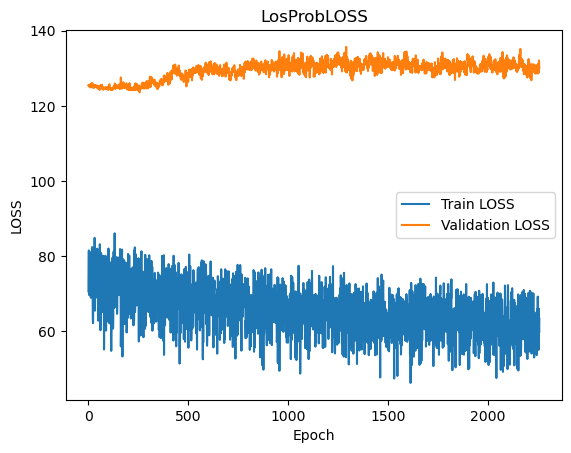

In [36]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [37]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'  
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv' 

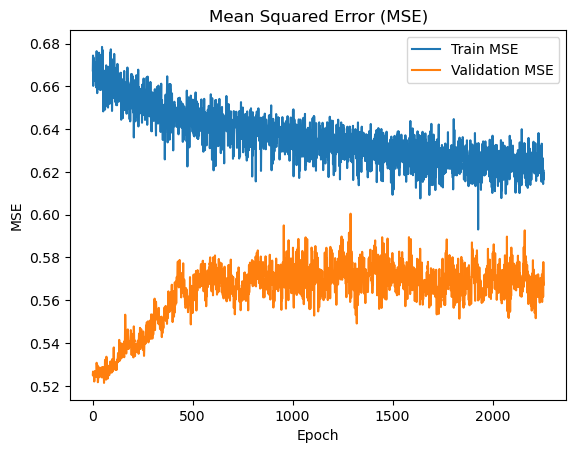

In [38]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [39]:
# Replace with the path to your history_mae_train CSV file
history_mae_train_file = './history_mae_train.csv'
# Replace with the path to your history_mae_val CSV file
history_mae_val_file = './history_mae_val.csv'  
# Replace with the path to your epoch_counter_train_mae CSV file
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'  

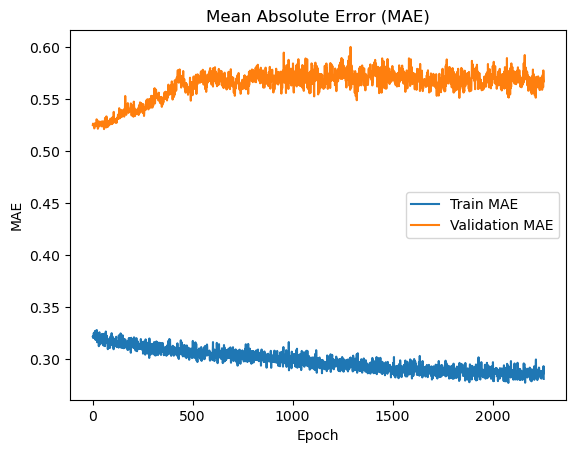

In [40]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [41]:
save=st.save_model(model, MODEL_PATH)#saving the trained model

# Prediction

In [42]:
from QNPy import PREDICTION as pred #Importing PREDICTION module from the package - renamed to pred
from QNPy.PREDICTION import * #Importing all packages from PREDICTION module
from QNPy.PREDICTION import plot_function #The functions plot_function must be imported separately

In [43]:
#defining the device, it can be cpu of cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [44]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [45]:
pred.prepare_output_dir(OUTPUT_PATH)#clearing outputh dir, it can be sciped

In [46]:
model = pred.load_trained_model(MODEL_PATH, device) #loading the model

In [47]:
criterion, mseMetric= pred.get_criteria()#loading criterion and metrics from model

In [48]:
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting

if __name__ == "__main__":
    folder_path = "./dataset/test"  # Change this to your dataset folder

    pred.remove_padded_values_and_filter(folder_path)

Deleted file with 'minus' or 'plus' in the name: 1384375_minus_split0.csv
Deleted file with 'minus' or 'plus' in the name: 1387439_minus_split18.csv
Removed padding in file: 1388041_original_split22.csv
Removed padding in file: 1389779_original_split31.csv
Deleted file with 'minus' or 'plus' in the name: 1390447_minus_split33.csv
Deleted file with 'minus' or 'plus' in the name: 1390452_plus_split38.csv
Deleted file with 'minus' or 'plus' in the name: 1392447_minus_split42.csv
Deleted file with 'minus' or 'plus' in the name: 1394659_minus_split45.csv
Deleted file with 'minus' or 'plus' in the name: 1396102_plus_split50.csv
Deleted file with 'minus' or 'plus' in the name: 1405638_minus_split60.csv


In [49]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting

if __name__ == "__main__":
    folder_path = "./dataset/train"  # Change this to your dataset folder

    pred.remove_padded_values_and_filter(folder_path)

Removed padding in file: 1384375_original_split1.csv
Deleted file with 'minus' or 'plus' in the name: 1384375_plus_split2.csv
Deleted file with 'minus' or 'plus' in the name: 1384957_minus_split3.csv
Removed padding in file: 1384957_original_split4.csv
Deleted file with 'minus' or 'plus' in the name: 1384957_plus_split5.csv
Deleted file with 'minus' or 'plus' in the name: 1385163_minus_split6.csv
Removed padding in file: 1385163_original_split7.csv
Deleted file with 'minus' or 'plus' in the name: 1385163_plus_split8.csv
Deleted file with 'minus' or 'plus' in the name: 1385234_minus_split9.csv
Deleted file with 'minus' or 'plus' in the name: 1385234_plus_split11.csv
Deleted file with 'minus' or 'plus' in the name: 1385498_minus_split12.csv
Removed padding in file: 1385498_original_split13.csv
Deleted file with 'minus' or 'plus' in the name: 1385498_plus_split14.csv
Deleted file with 'minus' or 'plus' in the name: 1387386_minus_split15.csv
Deleted file with 'minus' or 'plus' in the name:

In [50]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting

if __name__ == "__main__":
    folder_path = "./dataset/val"  # Change this to your dataset folder

    pred.remove_padded_values_and_filter(folder_path)

Removed padding in file: 1385234_original_split10.csv
Removed padding in file: 1387386_original_split16.csv
Deleted file with 'minus' or 'plus' in the name: 1387386_plus_split17.csv
Removed padding in file: 1387439_original_split19.csv
Removed padding in file: 1389604_original_split28.csv
Deleted file with 'minus' or 'plus' in the name: 1389604_plus_split29.csv
Removed padding in file: 1396102_original_split49.csv
Removed padding in file: 1401447_original_split55.csv
Deleted file with 'minus' or 'plus' in the name: 1405638_plus_split62.csv


In [51]:
testLoader=pred.load_test_data(DATA_PATH_TEST)#loading test data

In [52]:
trainLoader=pred.load_train_data(DATA_PATH_TRAIN)#loading trained data

In [53]:
valLoader=pred.load_val_data(DATA_PATH_VAL)#loading validation data

In [54]:
#prediction and plotting the test data
testMetrics=pred.plot_light_curves_from_test_set(model, testLoader, criterion, mseMetric, plot_function, device)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.25it/s]


<Figure size 640x480 with 0 Axes>

In [55]:
saveTestMetric=pred.save_test_metrics('./output/predictions/', testMetrics) #saving the test Metrics

In [56]:
#prediction and plotting the train data
trainMetrics=pred.plot_light_curves_from_train_set(trainLoader, model, criterion, mseMetric, plot_function, device)

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:02<00:00,  5.93it/s]


<Figure size 640x480 with 0 Axes>

In [57]:
saveTrainMetric=pred.save_train_metrics('./output/predictions/', trainMetrics)#saving the train metrics 

In [58]:
#prediction and plotting the val data
valMetric=pred.plot_light_curves_from_val_set(model, valLoader, criterion, mseMetric, plot_function, device)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.20it/s]


<Figure size 640x480 with 0 Axes>

In [59]:
saveValMetrics=pred.save_val_metrics('./output/predictions/', valMetric)#saving the val metrics 